<a href="https://colab.research.google.com/github/vishal-suri/ExData_Plotting1/blob/master/Personal_Loan_Campaign_Vishal_Suri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Personal Loan Campaign

Submitted by - Vishal Suri

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Solution Strategy
1. Determine and fix missing data, duplicate data, erroneous data
2. Carry out EDA - Univariate and Bivariate analysis to understand the datasets better.
3. Build models through decision trees - based model, pre-pruning model, and post pruning model, and compare their performance.  
4. Build model for logistic regression and compare its performance with the decision tree performance.  Choose the best model.
5. Use Maximize Recall strategy as the criterion for performance in this case, as there is no cost mentioned for marketing, so one must eliminate false negatives even at high compromise to false positives.
6. Segment customers by dropping the loan accepted column to understand features of each segment; add back the loan accepted to each segment and determing their converstion.
7.  Recommend marketing strategies based on the model evaluations from classification models and segmentation model.

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 plotly==5.24.1 sklearn-pandas==2.2.0 nb-black -q --user




  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, there is a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [5]:
# Import libraries to read and manipulate data
import pandas as pd
import numpy as np
import plotly.express as px

# Import libaries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to split data
from sklearn.model_selection import train_test_split

# Import library to build prediction model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import library to measure performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score, #Needed for logistics regression
    precision_recall_curve,#Needed for logistics regression
    roc_curve, #Needed for logistics regression
)
# To build logistic regression model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


#To build customer segmentation through Kmeans

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform t-SNE
from sklearn.manifold import TSNE

# to define a common seed value to be used throughout
RS=0


# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning #Needed for logistics regression

warnings.simplefilter("ignore", ConvergenceWarning) #Needed for logistics regression

## Loading the dataset

In [6]:
df=pd.read_csv('Loan_Modelling.csv') #Read the dataset from Loan Modelling file
data=df.copy() #Make a copy to not spoil the original dataset

## Data Overview

In [7]:
data.head() # view the first five rows of data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**Observations** :
1. *No missing values in top 5 rows, ID seems to be redundant, many classes could be categorical.*

In [8]:
data.tail() # view the last five rows of data

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

**Observations** :
1. *No missing values in bottom 5 rows; People who took loan seems a relatively small number.  No positives so far.*

In [9]:
data.shape # check the number of rows and columns

(5000, 14)

**Observations** :
1. *The data has 5000 rows and 14 columns*

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations** :
1. *No null or missing values in the data*

In [11]:
data.info() # check the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations** :
1. *Credit Card average debt is the only float.*
2. *Rest all are int.*
3. *ID seems redundant.*
4. *Zipcode, Education, Personal Loan, Securities_account, CD_account, Online, CreditCard - all Seven could have been categorical variables.*

In [12]:
data.describe().T # Statistical summary of the data

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations** :
1. *ID seems redundant.*  
2. *The customers are 23-67 years old, with an average age of 45 years.*
3. *They have an average experience of -3 to 43 years.*  ***Need to fix entries with negative experience.***
4. *Customers in the dataset have annual incomes from 8k to 224k, with a mean of 73k and median of 64k. Implies Right skew in the data.*
5. *Zipcode could perhaps be used as a proxy for the general area that the customers live in.  Could be an indicator of wealth or social status.*
6. *Family size is 1-4 in the dataset.*
7. *Average monthly spending on credit card varies from zero to 10k, with a mean of 1.938k and median of 1.5k.  Implies Right skew in the data with perhaps lots of outliers.*
8. *Education should be a categorical variable, varies from 1-3 in the dataset.*
9. *Mortgage amount varies from zero to 635k with an average of 56k and median of zero.  Shows heavy right skew in the data.*
10. *Personal loan should be a categorical variable.  A small fraction of customers took loans.*
11. *Relatively few customers have security accounts and CD accounts.*
12. *Relatively higher number of customers use internet banking and credit cards from other banks.*


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Univariate Analysis**

In [13]:
data['ID'].nunique() #Find the number of unique entries in 'ID'

5000

**Observations** :
1. *ID has 5000 unique identifiers so can be dropped from this analysis.*

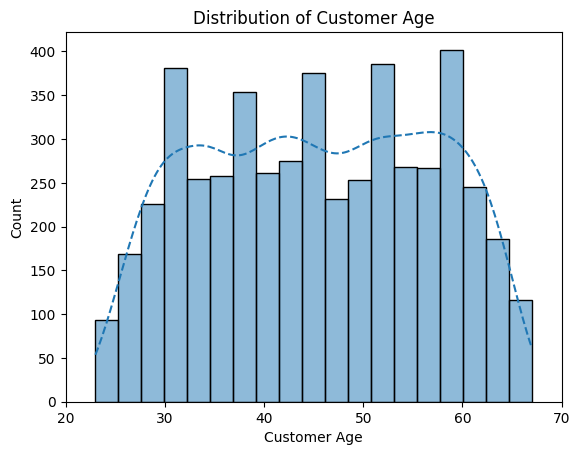

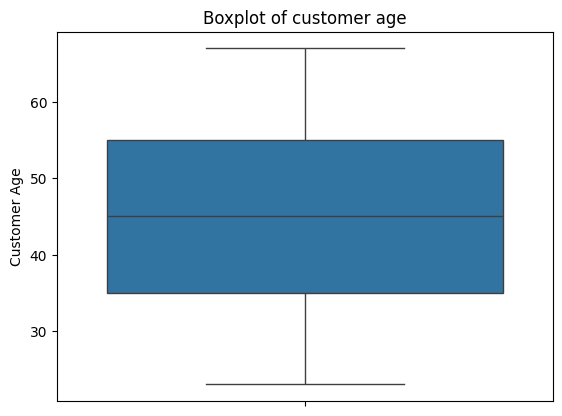

Minimum customer age is 23
Maximum customer age is 67
Average customer age is 45.3384
Median customer age is  45.0


In [14]:
#Histogram of the Customer Age
ax=sns.histplot(data=data,x='Age',kde=True,line_kws={'linestyle':'--'})
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
ax.set_xticks(np.arange(20,80,10)) #Set ticks at interval of 10
plt.show()
#Boxplot of Customer Age
bx=sns.boxplot(data=data,y='Age')
plt.title('Boxplot of customer age')
plt.ylabel('Customer Age')
plt.show()
#Get and print key values of the distribution
min=data['Age'].min()
maxi=data['Age'].max()
average=data['Age'].mean()
med=data['Age'].median()
print("Minimum customer age is",min)
print("Maximum customer age is",maxi)
print("Average customer age is",average)
print("Median customer age is ",med)


**Observations** :

1. *Customer Age is a near-normal distribution with no outliers.*

For Experience, we should fix the negative values in the data.

In [15]:
neg_exp=data[data['Experience']<0] #subset the entries with negative experience
neg_exp.shape[0] #Find the number of entries with experience punched negative

52

About 1% of entries have experience punched negative; Assume that the minus sign was a typo and convert those to positive enries

In [16]:
data['Experience']=data['Experience'].abs() #Convert negative experience to positive

In [17]:
data[data['Experience']<0].shape[0] #Check if negative entries remain

0

Experience is now completely converted to positive entries

In [18]:
#Functions to plot histogram and box plot in one go :
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,line_kws={'linestyle':'--'}
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,line_kws={'linestyle':'--'}
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.tight_layout
    plt.show()


In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique() #occurences of different bins
    if count>10:
      n=10 #If there are too many unique values, plot the first 10
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Get Histograms and boxplots of all numerical features

Convert all features that should have been categorical to categorical

In [20]:
#Convert all features that should have been categorical to categorical
cat_features=['ZIPCode','Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for feature in cat_features:
    data[feature]=data[feature].astype('category')
    print("type of", feature, "feature is", data[feature].dtype)

type of ZIPCode feature is category
type of Family feature is category
type of Education feature is category
type of Personal_Loan feature is category
type of Securities_Account feature is category
type of CD_Account feature is category
type of Online feature is category
type of CreditCard feature is category


In [21]:
#get column names of all numerical columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

['ID', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


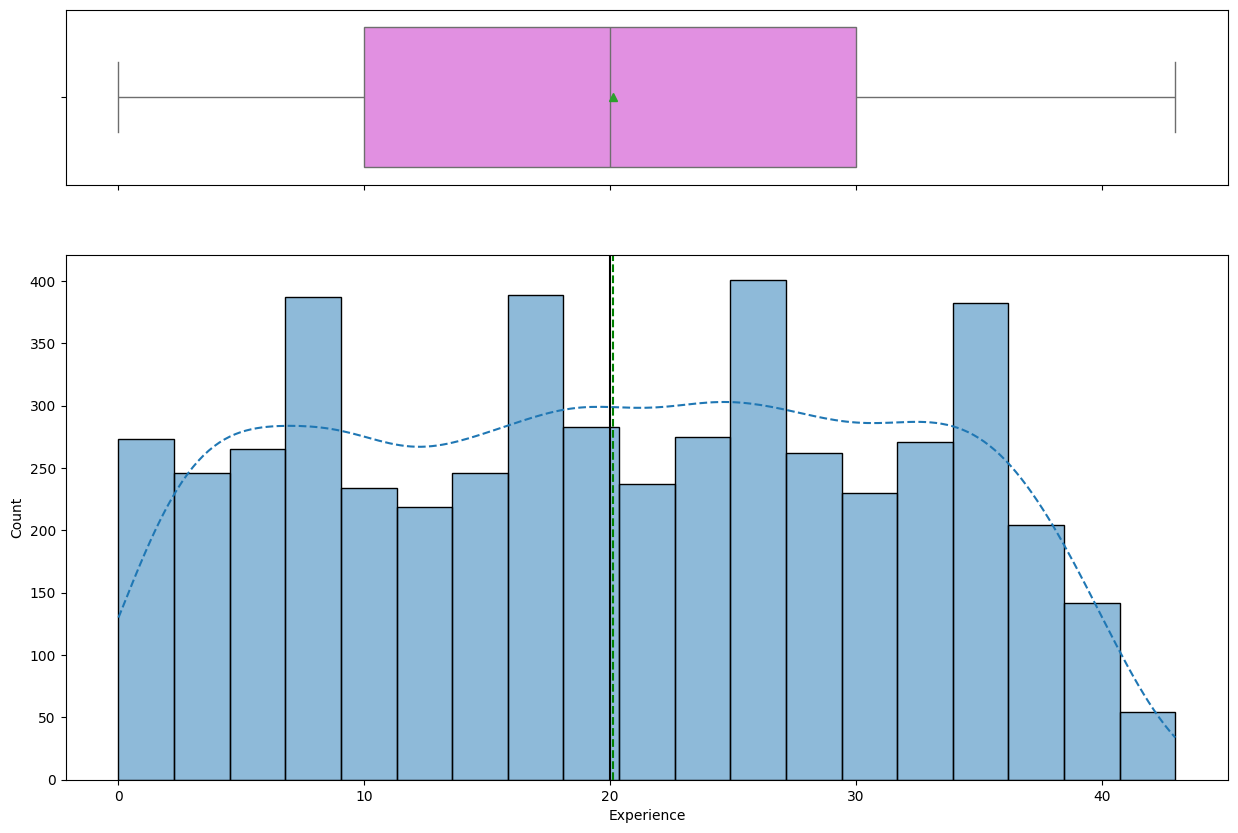

Minimum customer experience is 0
Maximum customer experience is 43
Average customer experience is 20.1346
Median customer experience is  20.0


In [22]:
histogram_boxplot(data,'Experience')

#Get and print key values of the distribution
min=data['Experience'].min()
maxi=data['Experience'].max()
average=data['Experience'].mean()
med=data['Experience'].median()
print("Minimum customer experience is",min)
print("Maximum customer experience is",maxi)
print("Average customer experience is",average)
print("Median customer experience is ",med)


**Observations** :

1. *Experience is a more flat distribution tapering off at about 40; with no outliers.*

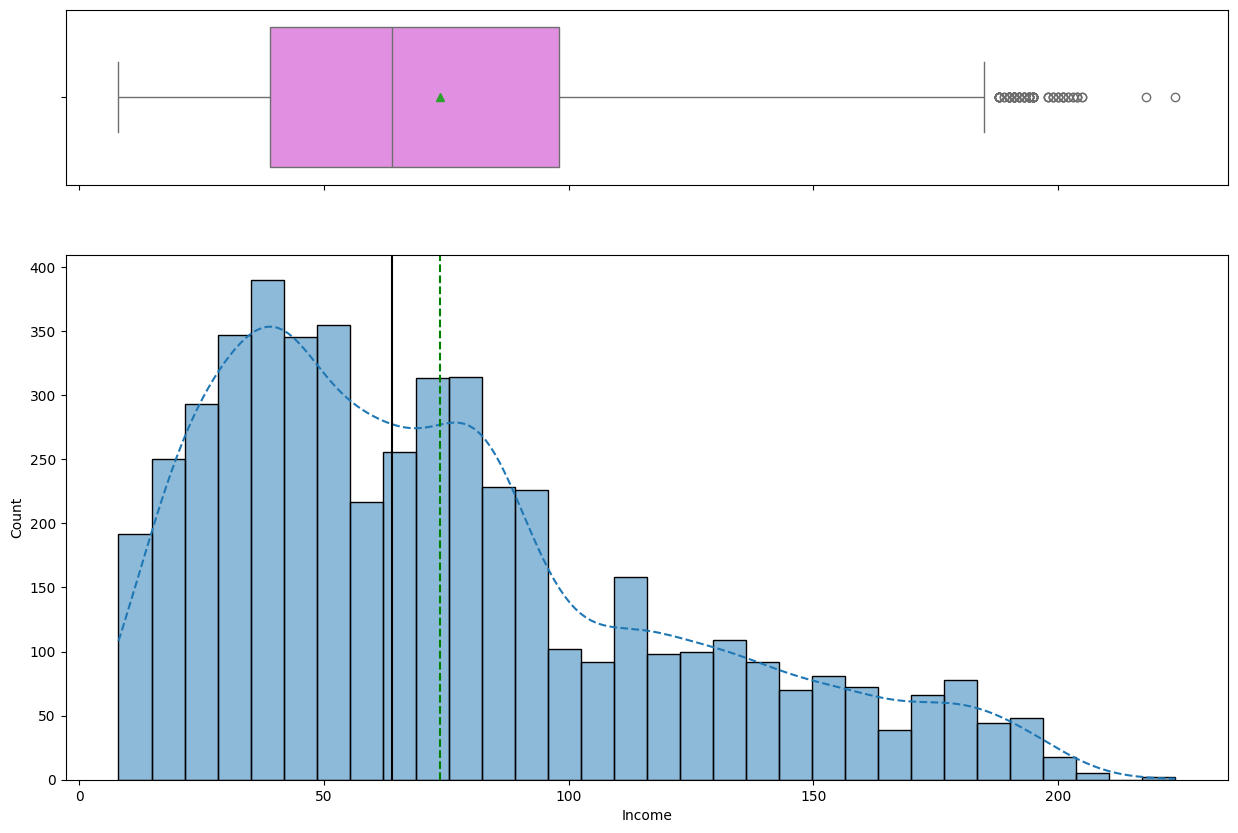

Minimum customer income is 8 thousand dollars per annum
Maximum customer income is 224 thousand dollars per annum
Average customer income is 73.7742 thousand dollars per annum
Median customer income is  64.0 thousand dollars per annum


In [23]:
histogram_boxplot(data,'Income')

#Get and print key values of the distribution
min=data['Income'].min()
maxi=data['Income'].max()
average=data['Income'].mean()
med=data['Income'].median()
print("Minimum customer income is",min,"thousand dollars per annum")
print("Maximum customer income is",maxi,"thousand dollars per annum")
print("Average customer income is",average,"thousand dollars per annum")
print("Median customer income is ",med,"thousand dollars per annum")


**Observations** :

1. *Income is right skewed distribution with several outlier customers with high income.*

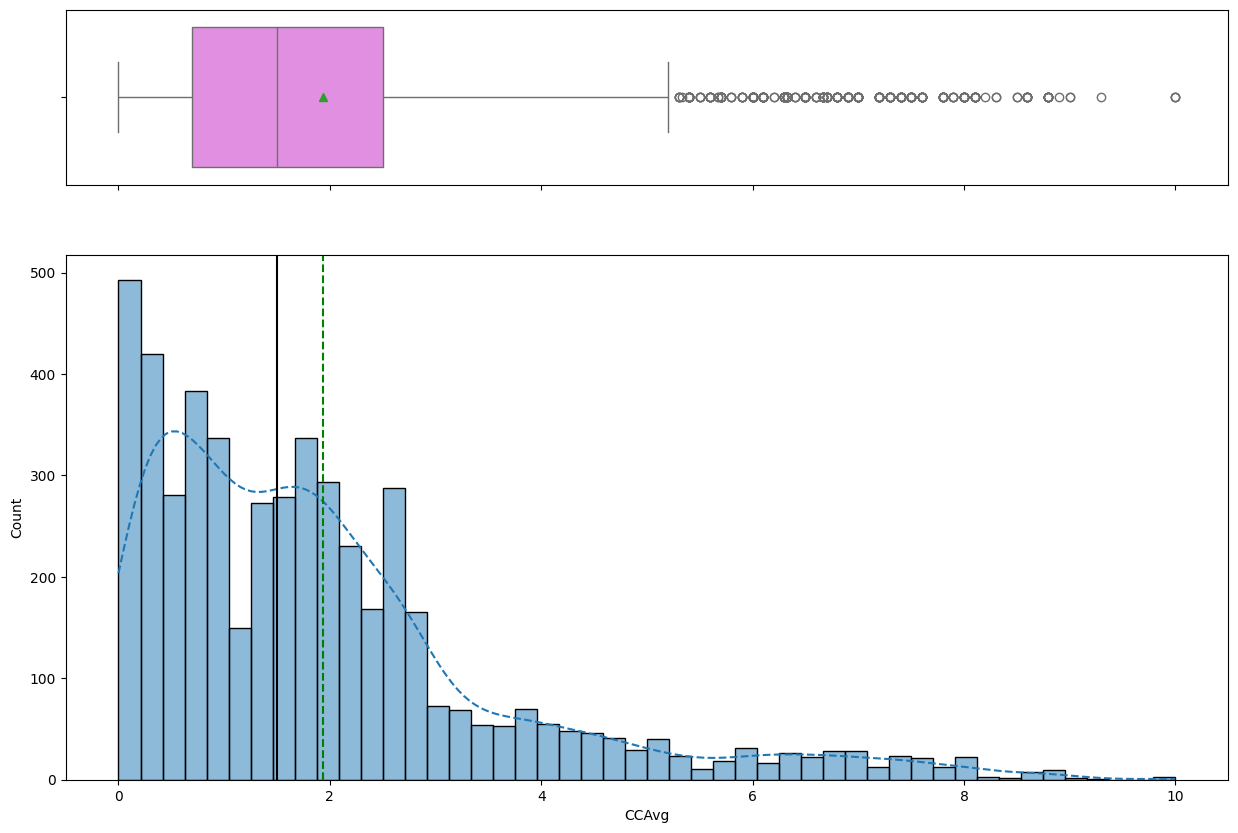

Minimum customer monthly credit card spend is 0.0 thousand dollars per annum
Maximum customer monthly credit card spend is 10.0 thousand dollars per annum
Average customer monthly credit card spend is 1.9379380000000002 thousand dollars per annum
Median customer monthly credit card spend is  1.5 thousand dollars per annum


In [24]:
histogram_boxplot(data,'CCAvg')

#Get and print key values of the distribution
min=data['CCAvg'].min()
maxi=data['CCAvg'].max()
average=data['CCAvg'].mean()
med=data['CCAvg'].median()
print("Minimum customer monthly credit card spend is",min,"thousand dollars per annum")
print("Maximum customer monthly credit card spend is",maxi,"thousand dollars per annum")
print("Average customer monthly credit card spend is",average,"thousand dollars per annum")
print("Median customer monthly credit card spend is ",med,"thousand dollars per annum")

**Observations** :

1. *Credit card spend is heavily right skewed distribution with several outlier customers with high credit card spends.*

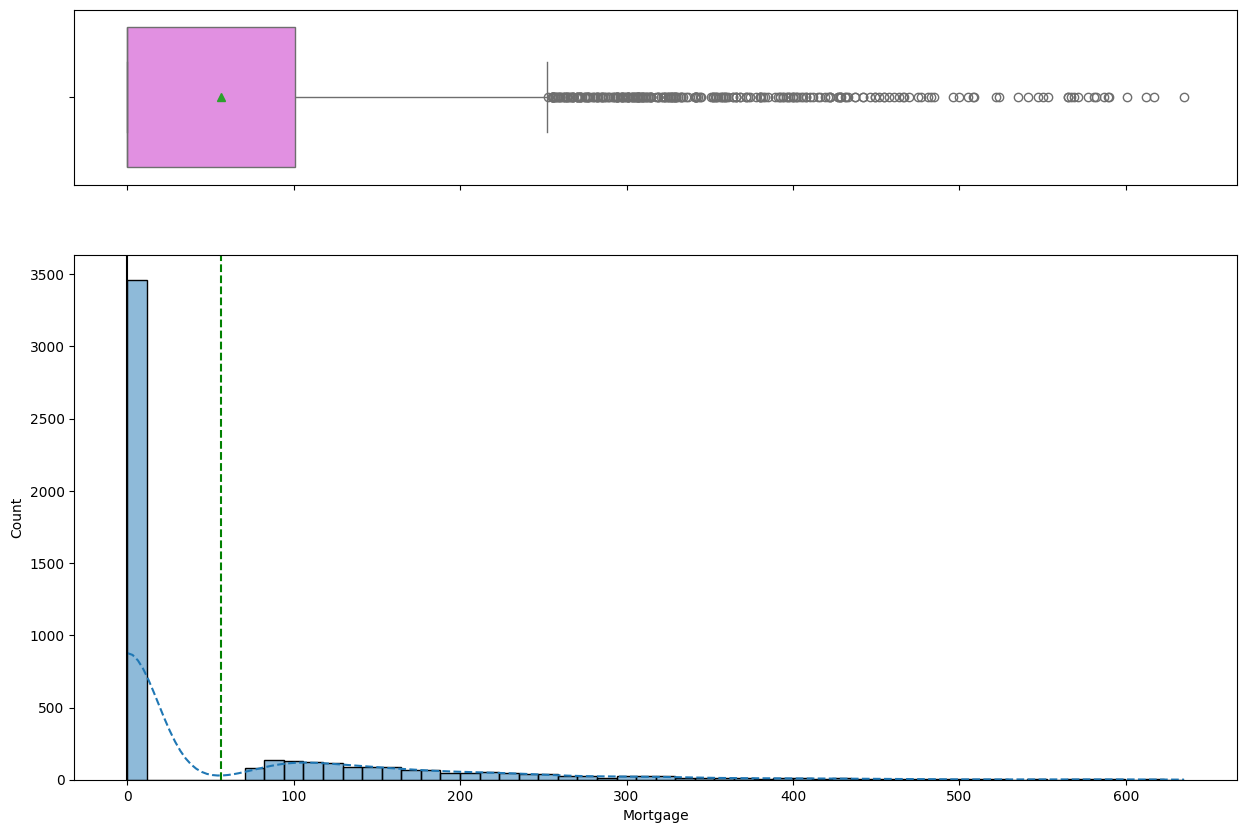

Minimum customer mortgage is 0 thousand dollars per annum
Maximum customer mortgage is 635 thousand dollars per annum
Average customer mortgage is 56.4988 thousand dollars per annum
Median customer mortgage is  0.0 thousand dollars per annum


In [25]:
histogram_boxplot(data,'Mortgage')

#Get and print key values of the distribution
min=data['Mortgage'].min()
maxi=data['Mortgage'].max()
average=data['Mortgage'].mean()
med=data['Mortgage'].median()
print("Minimum customer mortgage is",min,"thousand dollars per annum")
print("Maximum customer mortgage is",maxi,"thousand dollars per annum")
print("Average customer mortgage is",average,"thousand dollars per annum")
print("Median customer mortgage is ",med,"thousand dollars per annum")


**Observations** :

1. *Mortgage is even more heavily right skewed distribution with several outlier customers with high mortgages.*

Now let us plot barplots of all categorical variables

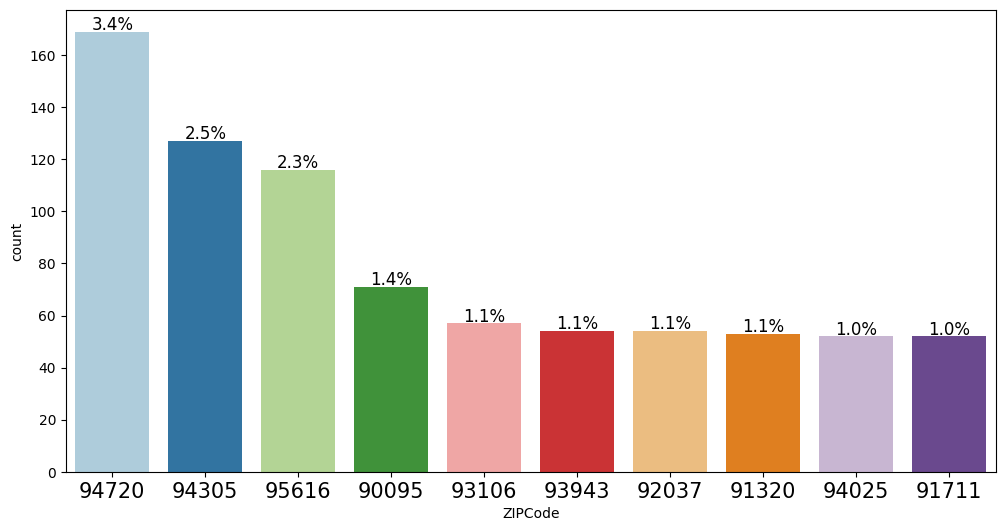

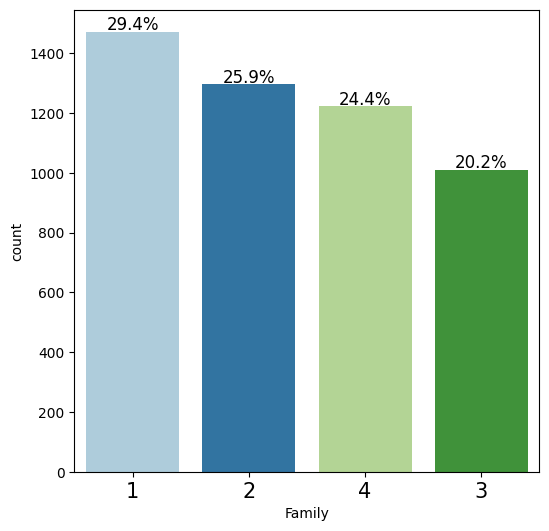

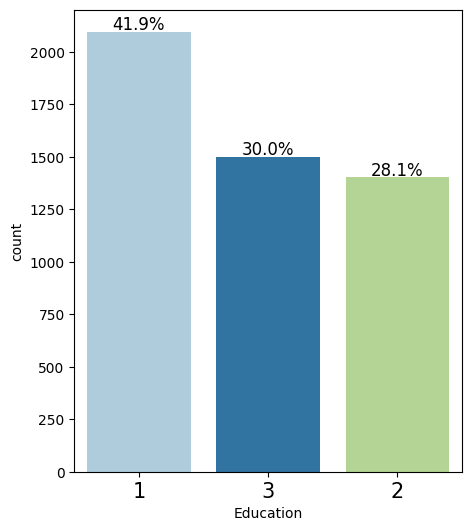

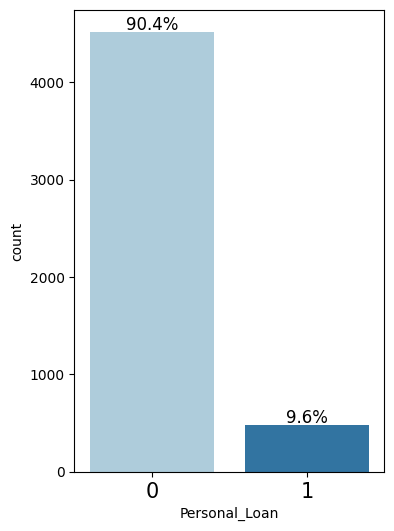

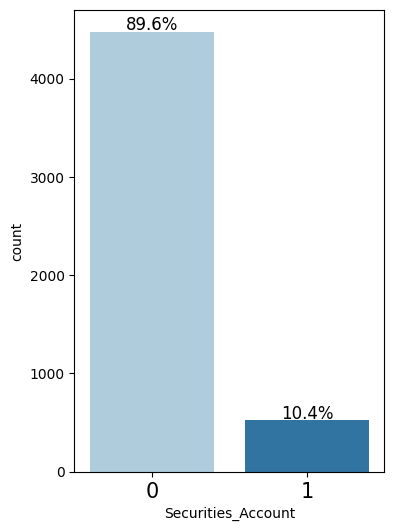

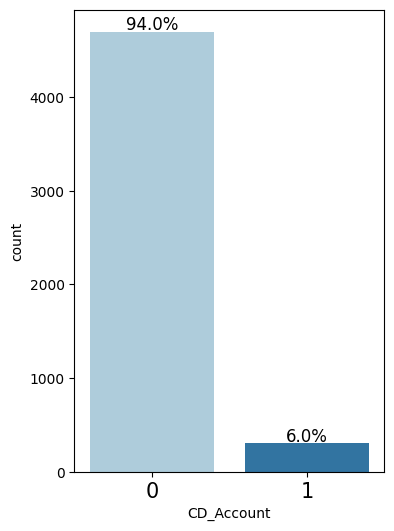

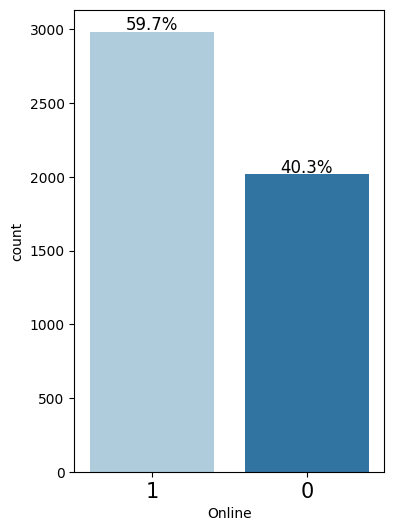

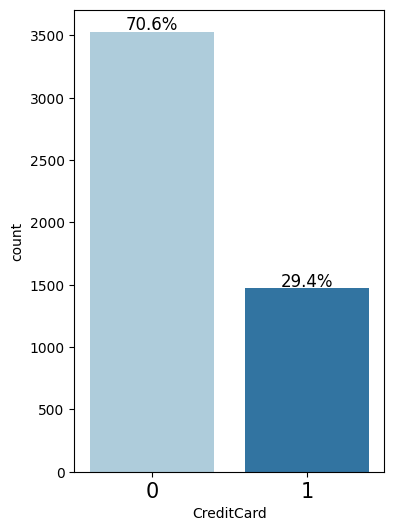

In [26]:
cat_data=data.select_dtypes(include='category')
for feature in cat_data.columns:
    labeled_barplot(data,feature,perc=True)

**Observations** :

1. *Hundreds of unique zipcodes in the customer database, so it will need to be dealt differently.  Only the top 10 got plotted as the function had that built in restriction to plot top 10 values.*
2. *About 30% of account holders are single, 26% have two family members, 24% are 4 member households, and 20% are 3 member households.*
3. *About 42% of account holders are undergraduates, 30% are advanced / professionals, and 28% are graduates.*
4. *9.6% of the account holders opted for personal loan in the last campaign.*
5. *10.4% of customers hold a securities account with the bank.*
6.  *6% of the customers hold a CD account.*
7.  *60% of the customers use online banking facilities while 40% do not.*
8.  *29.4% of customers hold a credit card from some bank other than All Life Bank.*

In [27]:
#Dealing with zip codes better
data['ZIPCode'].nunique()



467

Sicne there are 467 unique zip codes, need to simply them.

In [28]:
#Utilizing first two digits of zipcode as that could signify city or area code
data['ZIPCode']=data['ZIPCode'].astype(str) #convert to string to truncate to 2 digits
data['ZIPCode']=data['ZIPCode'].str[0:2] #Truncate each zipcode entry to 2 digits
data['ZIPCode'].nunique() #determine number of unique zipcode digits


7

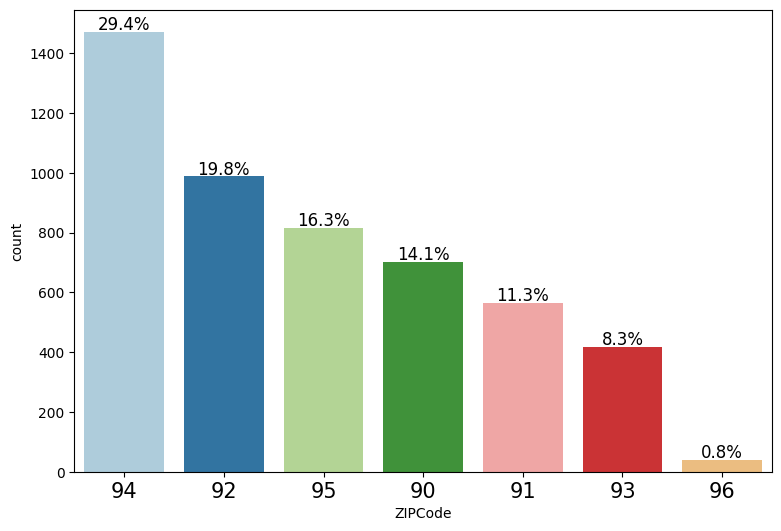

In [29]:
data['ZIPCode']=data['ZIPCode'].astype('category') #convert zipcode back to categorical variable
#Print zipcode this time with 7 categories
labeled_barplot(data,'ZIPCode',perc=True)

** *italicized text*Observations** :

1. *About 29% of customers belong to zipcodes starting with'94'*
2. *50% customers belog to either zipcodes starting with '94' or '92'*
3. *Less than 1% customers belong to zipcodes starting with '96'*


# Bivariate Analysis

In [30]:
#Function for stacked barplots to visualize the impact of categorical variables on taking the loan
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print("*" * 120)
    print(tab1)
    print("-" * 120)
    tab2=pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    print(tab2)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [31]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

************************************************************************************************************************
Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------
Personal_Loan         0         1
ZIPCode                          
93             0.896882  0.103118
95             0.901840  0.098160
91             0.902655  0.097345
90             0.904694  0.095306
92             0.904858  0.095142
94             0.906250  0.093750
96             0.925000  0.075000
------------------------------------------------------------------------------------------------------------------------


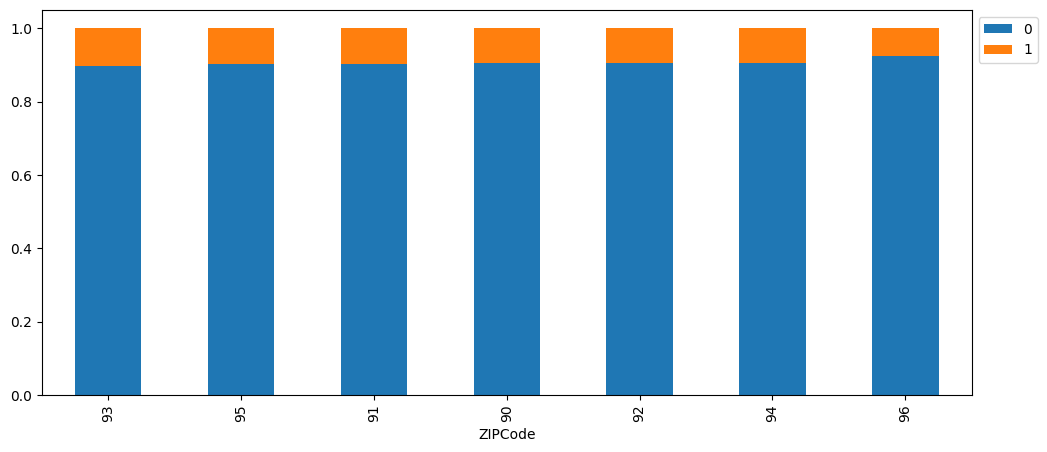

************************************************************************************************************************
Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------
Personal_Loan         0         1
Family                           
3              0.868317  0.131683
4              0.890344  0.109656
2              0.918210  0.081790
1              0.927310  0.072690
------------------------------------------------------------------------------------------------------------------------


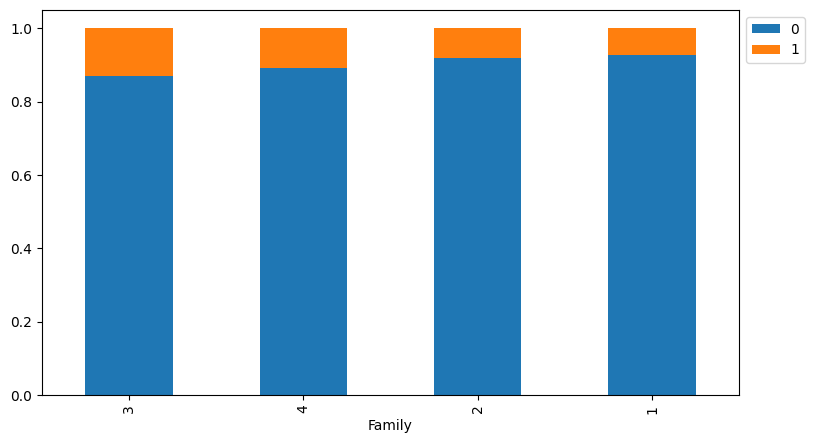

************************************************************************************************************************
Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------
Personal_Loan         0         1
Education                        
3              0.863424  0.136576
2              0.870278  0.129722
1              0.955630  0.044370
------------------------------------------------------------------------------------------------------------------------


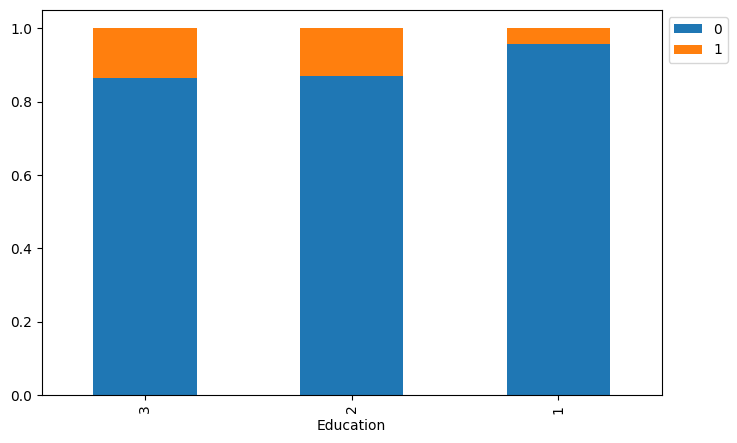

************************************************************************************************************************
Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------
Personal_Loan              0         1
Securities_Account                    
1                   0.885057  0.114943
0                   0.906208  0.093792
------------------------------------------------------------------------------------------------------------------------


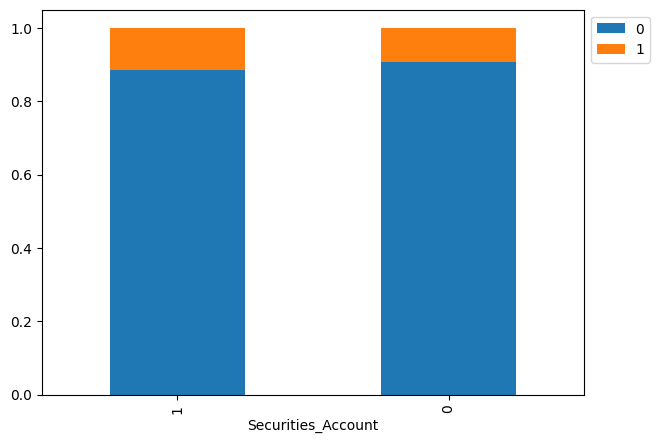

************************************************************************************************************************
Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------
Personal_Loan         0         1
CD_Account                       
1              0.536424  0.463576
0              0.927629  0.072371
------------------------------------------------------------------------------------------------------------------------


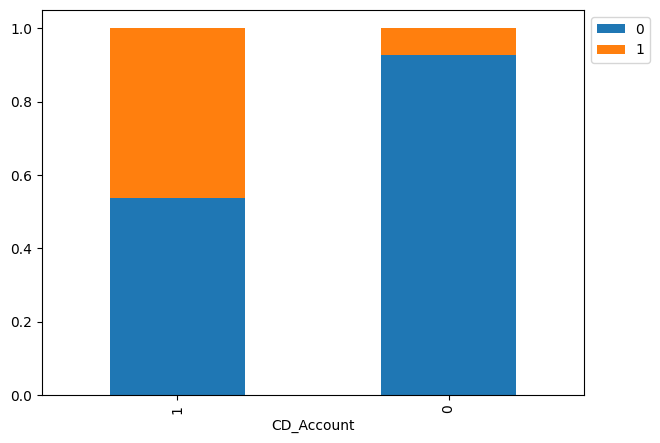

************************************************************************************************************************
Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------
Personal_Loan        0        1
Online                         
1              0.90248  0.09752
0              0.90625  0.09375
------------------------------------------------------------------------------------------------------------------------


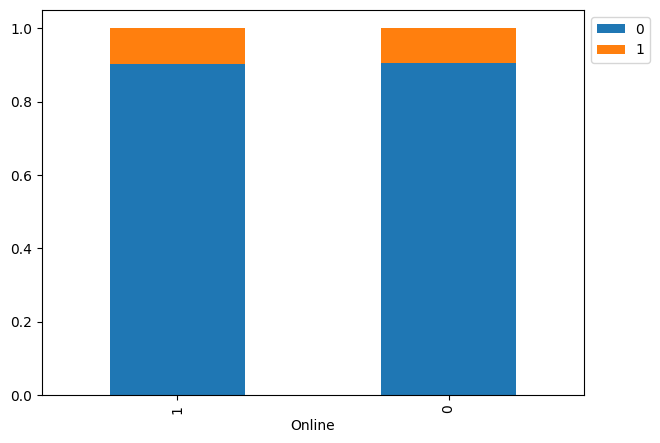

************************************************************************************************************************
Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------
Personal_Loan         0         1
CreditCard                       
1              0.902721  0.097279
0              0.904533  0.095467
------------------------------------------------------------------------------------------------------------------------


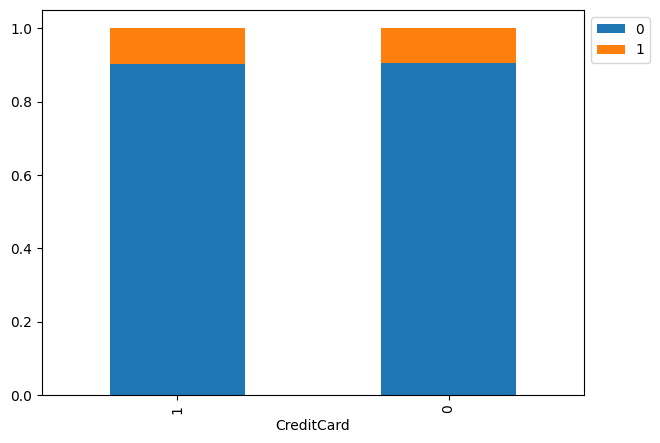

In [32]:
#Make Stacked barplots with categorical functions and infer relationships with taking loan
X=cat_data.copy()
X.drop('Personal_Loan',axis=1,inplace=True)
for feature in X.columns:
  stacked_barplot(data,feature,'Personal_Loan')

**Observations** :

1. *Customers living in zipcode beginning with '96' are least likely to accept personal loans,  while customers living in zipcode beginning with '93' are marginally more likely to accept personal loans*
2.  *Overall, Zipcode does not seem a very significant variable in predicting loan acceptance.*
3. *Customers with family size 3 are most likely to accept personal loans, followed by customers with family size 4 and 2.*
4. *Customers who are single are least likely to accept a personal loan.*
5. *Undergraduate customers are least likely to accept loans, while graduate and professionals are more likely to accept loans.*
6. *Customers who have a securities account are  more likely to accept loans.*
7. *Customers who have a CD account are  strongly linked to personal loan acceptance.*
8. *Use or not use of online banking does not have a strong bearing towards loan acceptance.*
9. *Use or not use of other credit cards is not a strong perdictior of loan acceptance.*

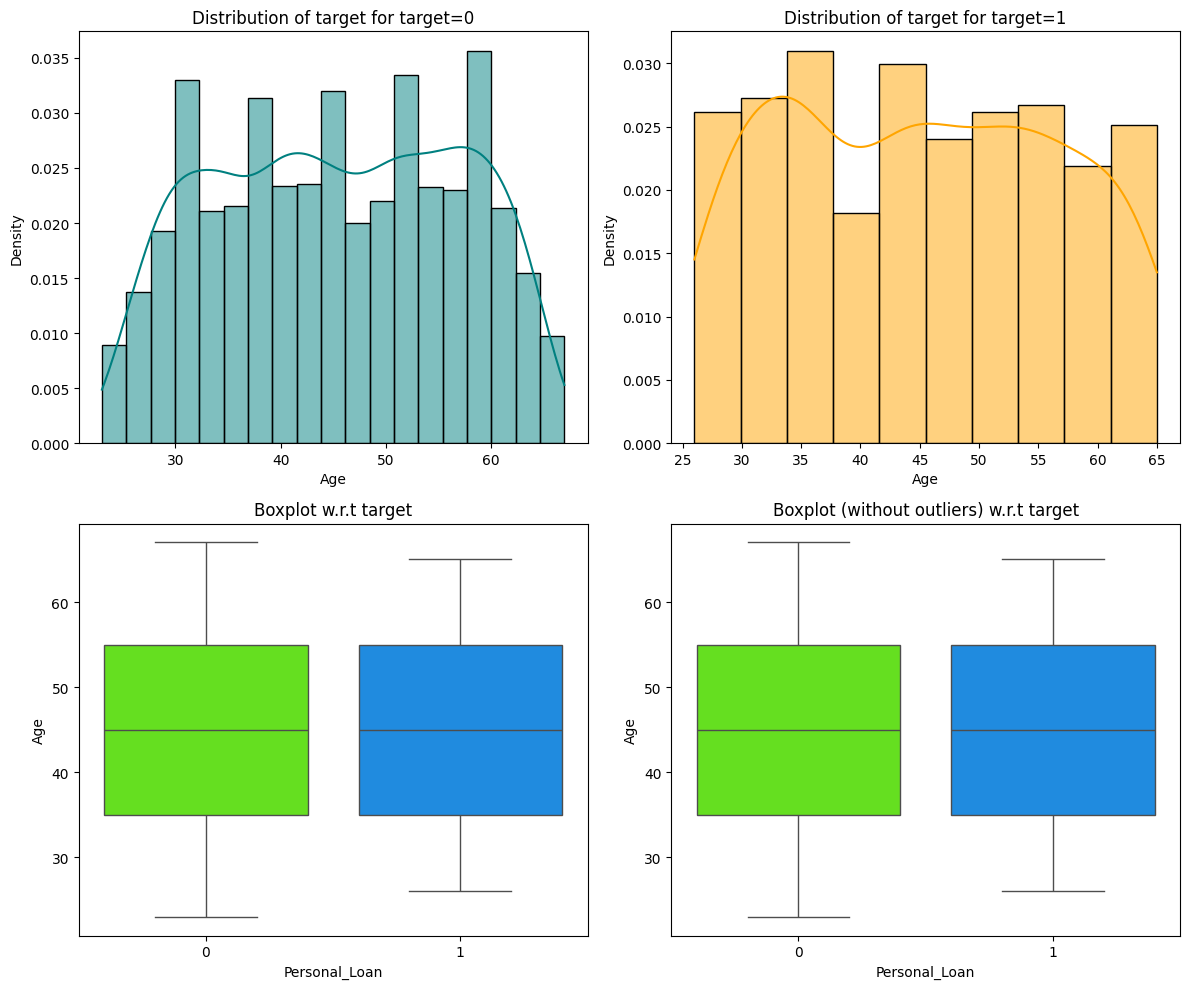

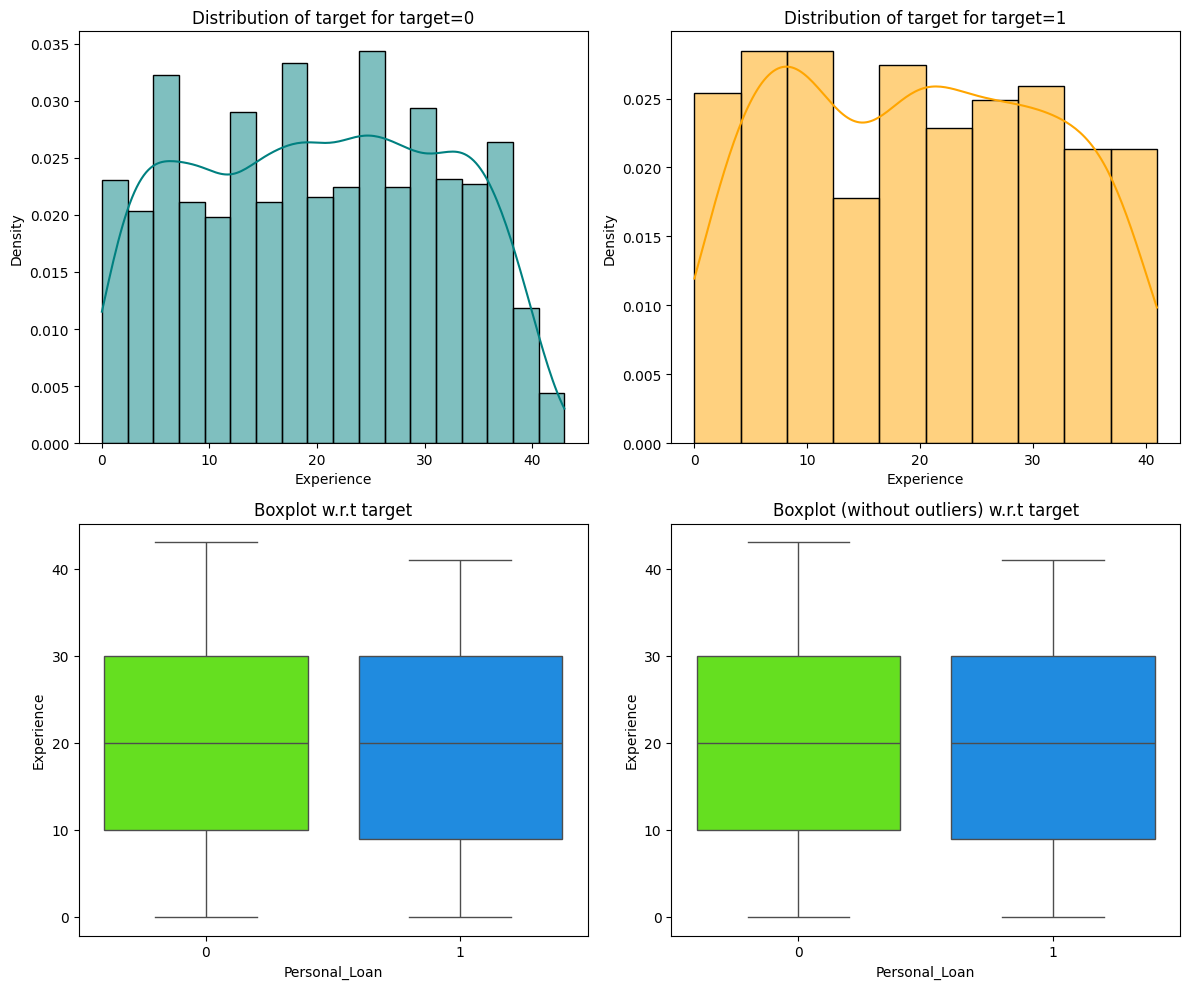

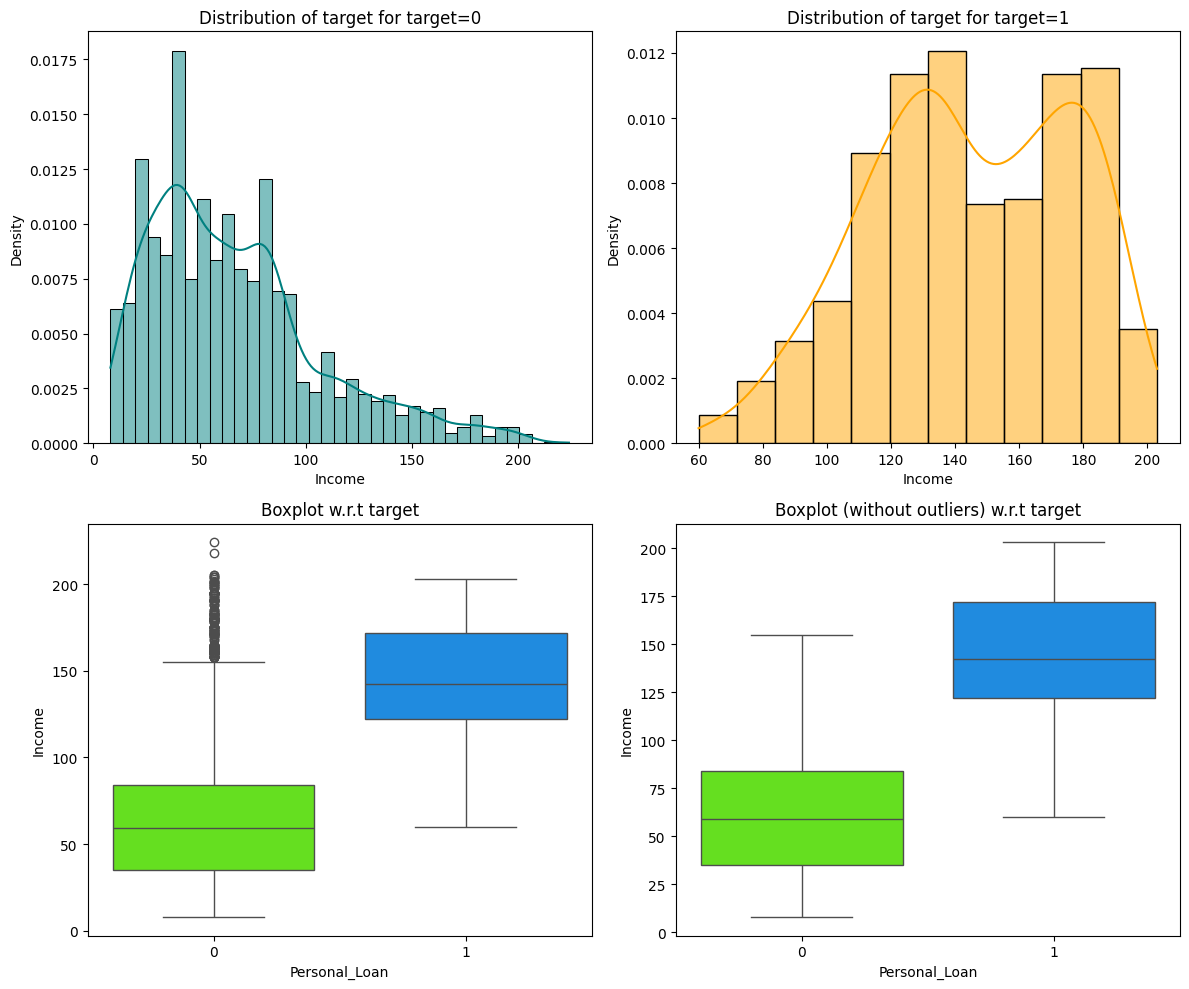

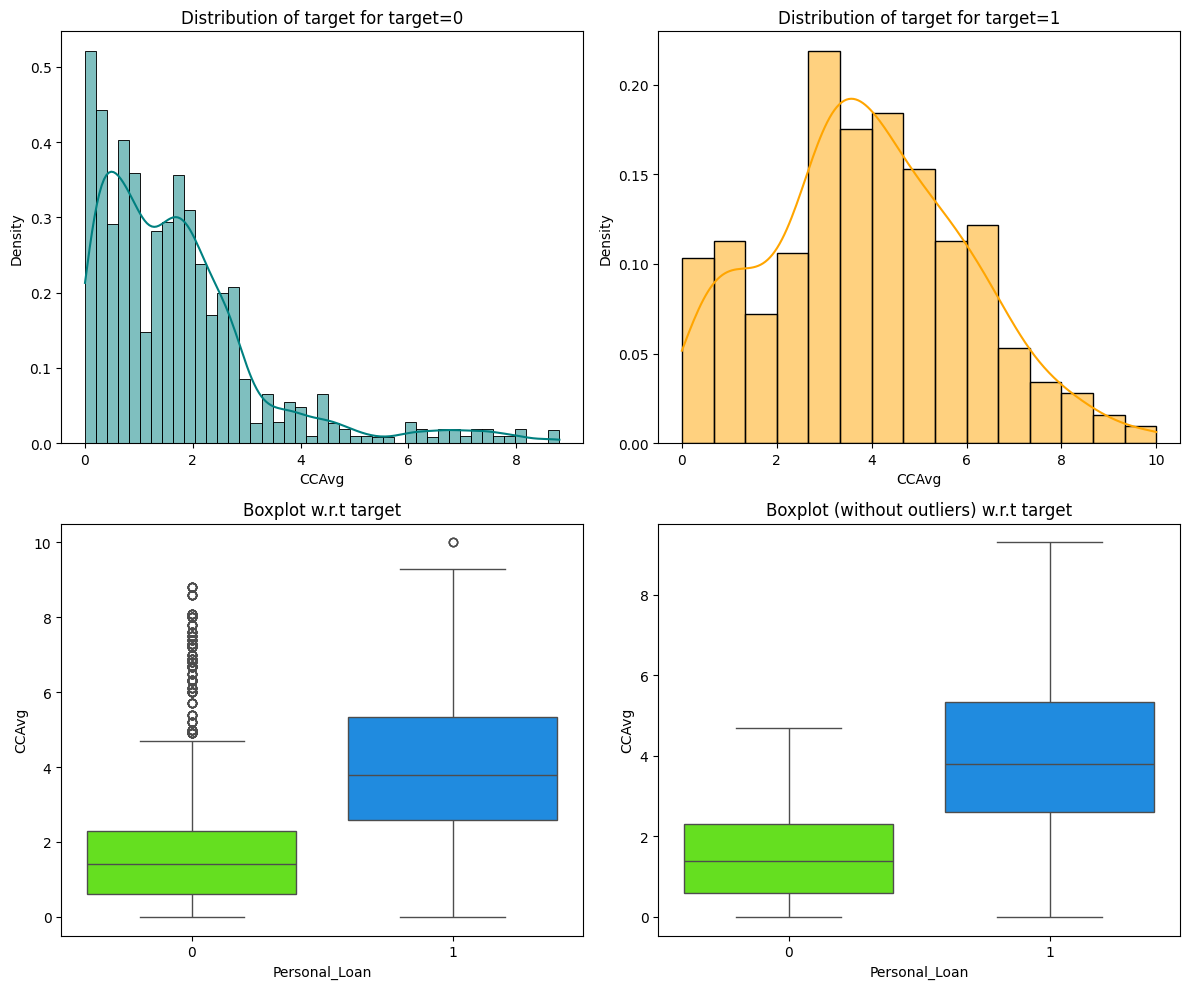

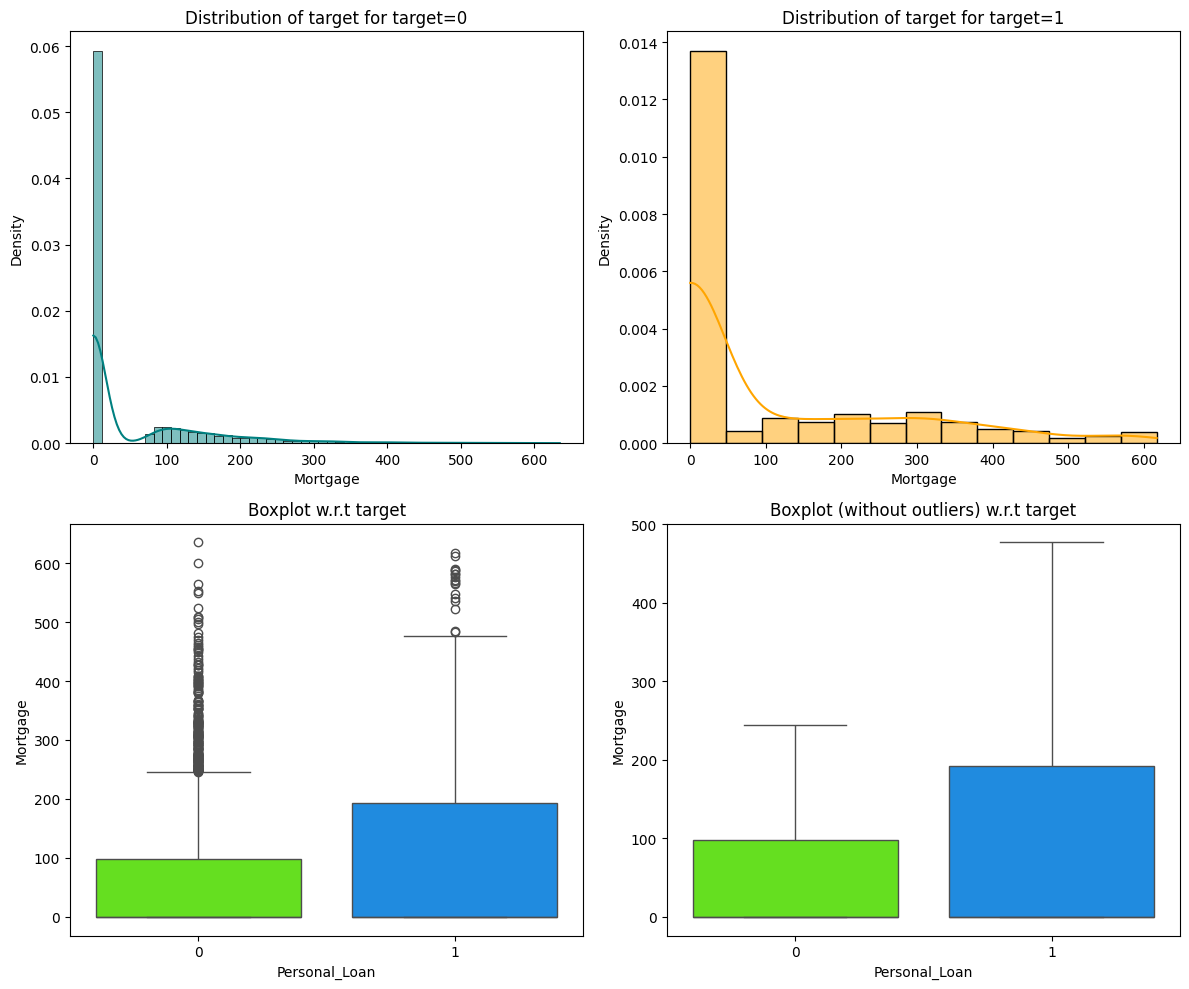

In [33]:
# Make Distributions with respect to target for numeric independent variables
# Drop the feature ID from numeric_cols
numeric_cols.remove('ID')
for feature in numeric_cols:
  distribution_plot_wrt_target(data,feature,'Personal_Loan')

**Observations :**
1. *Age - Distribution of taking versus not taking loan does not vary much by age.*
2. *Experience - Distribution of taking versus not taking loan does not vary much by experience.*
3. *Income - There is a strong skew of higher income customers having a higher propensity to loans than lower income customers.*
4. *Credit Card spend - High spenders on credit card have higher propensity for loan than low spenders.*
5. *Mortgage - Customers with higher morgages have slightly better propensity to get loans than those with smaller mortgages.*

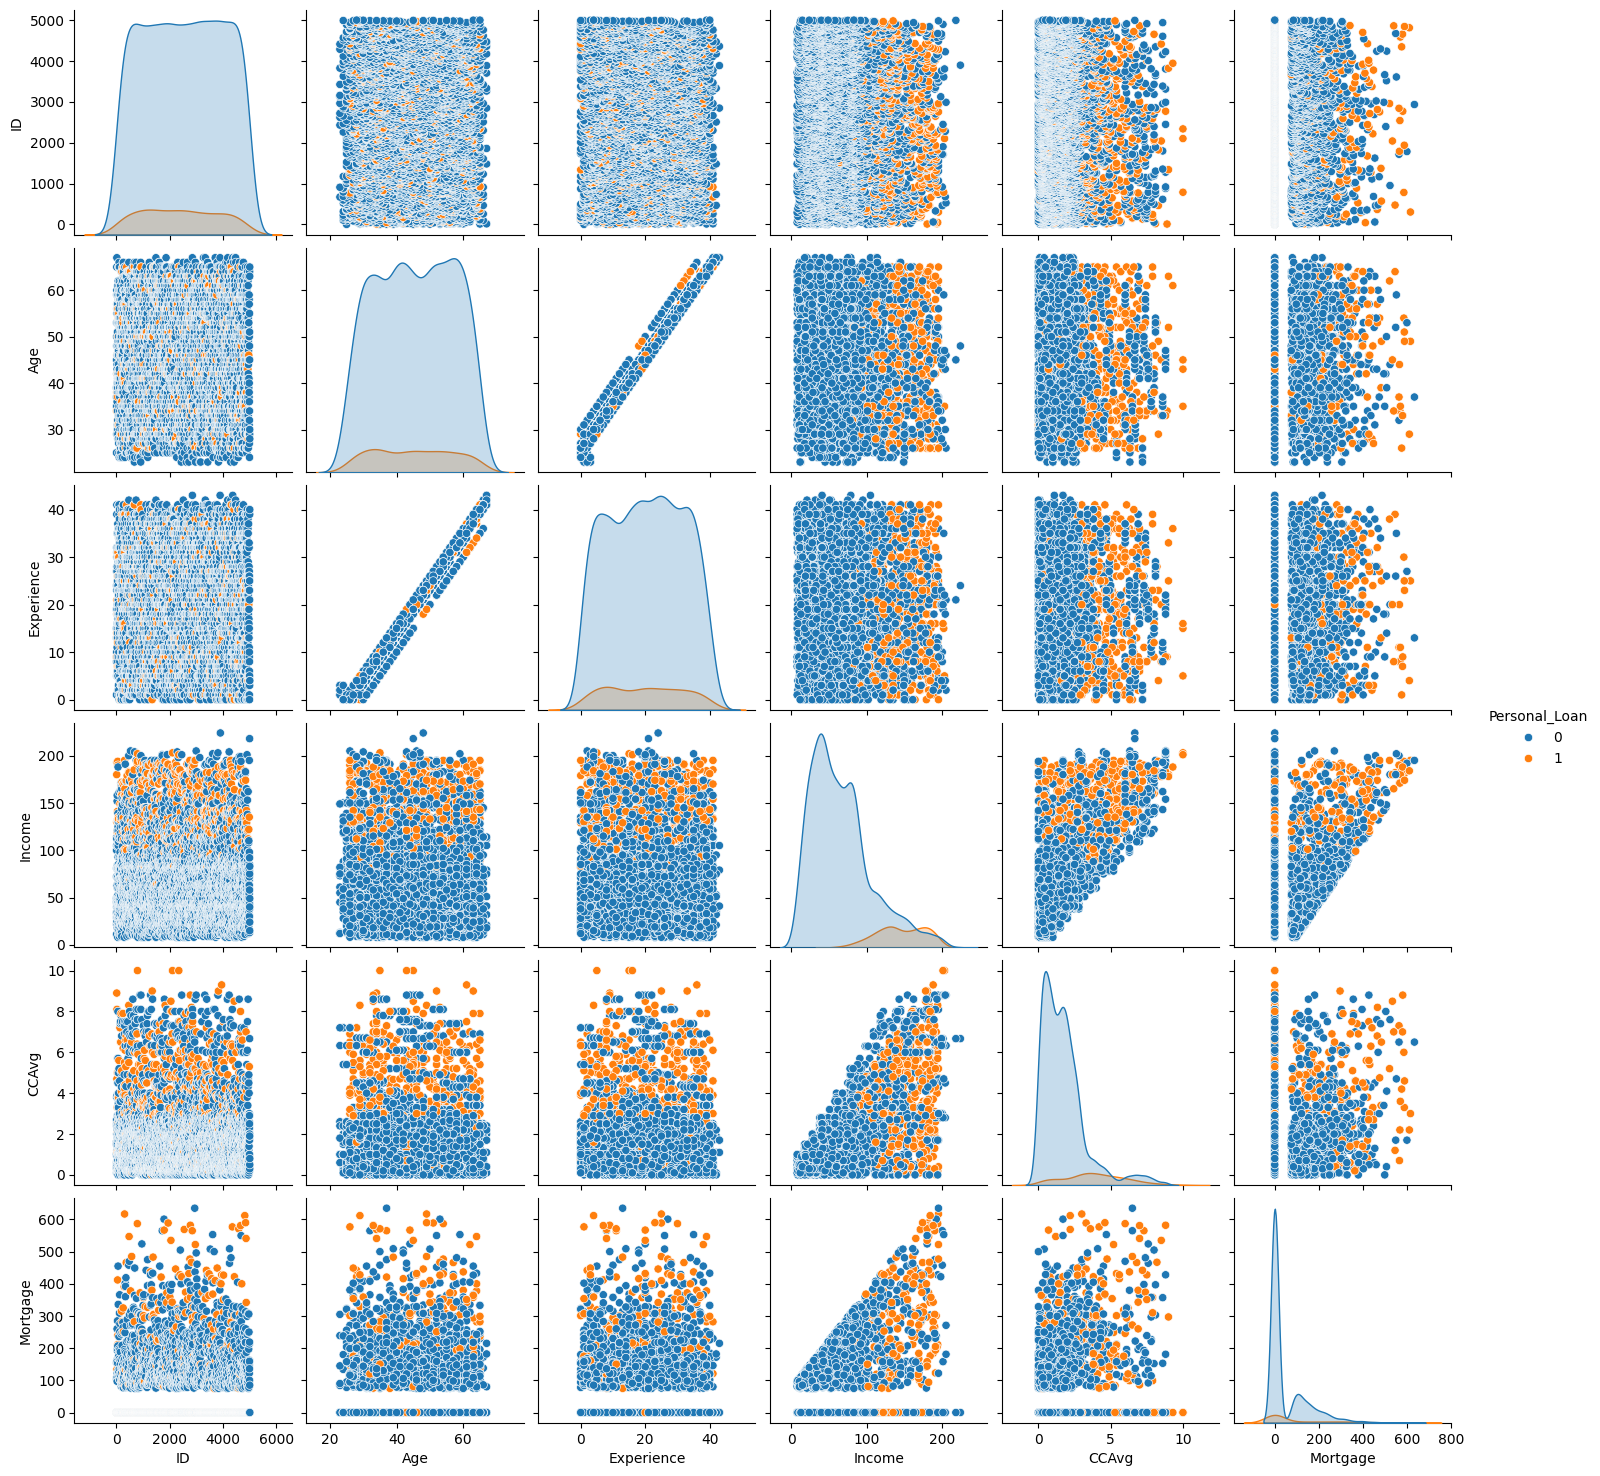

In [34]:
#Check the correlation of pairs of variables, including their relationship to getting a loan
sns.pairplot(data,hue='Personal_Loan')

**Observations :**
1. *Age and Experience are highly correlated to each other.  One of them should be removed to prevent multi-collinearity effect.*
2. *Higher income has a clear indication for higher chances for a loan, potentially showing that lower income customers are less likely to get approval for loans.*
3. *Higher credit card spend and higher mortgage values also have a linkage to higher probability of accepting a loan and being approved for loan.  However, the linkage is not as strong as that of income.*

<Axes: >

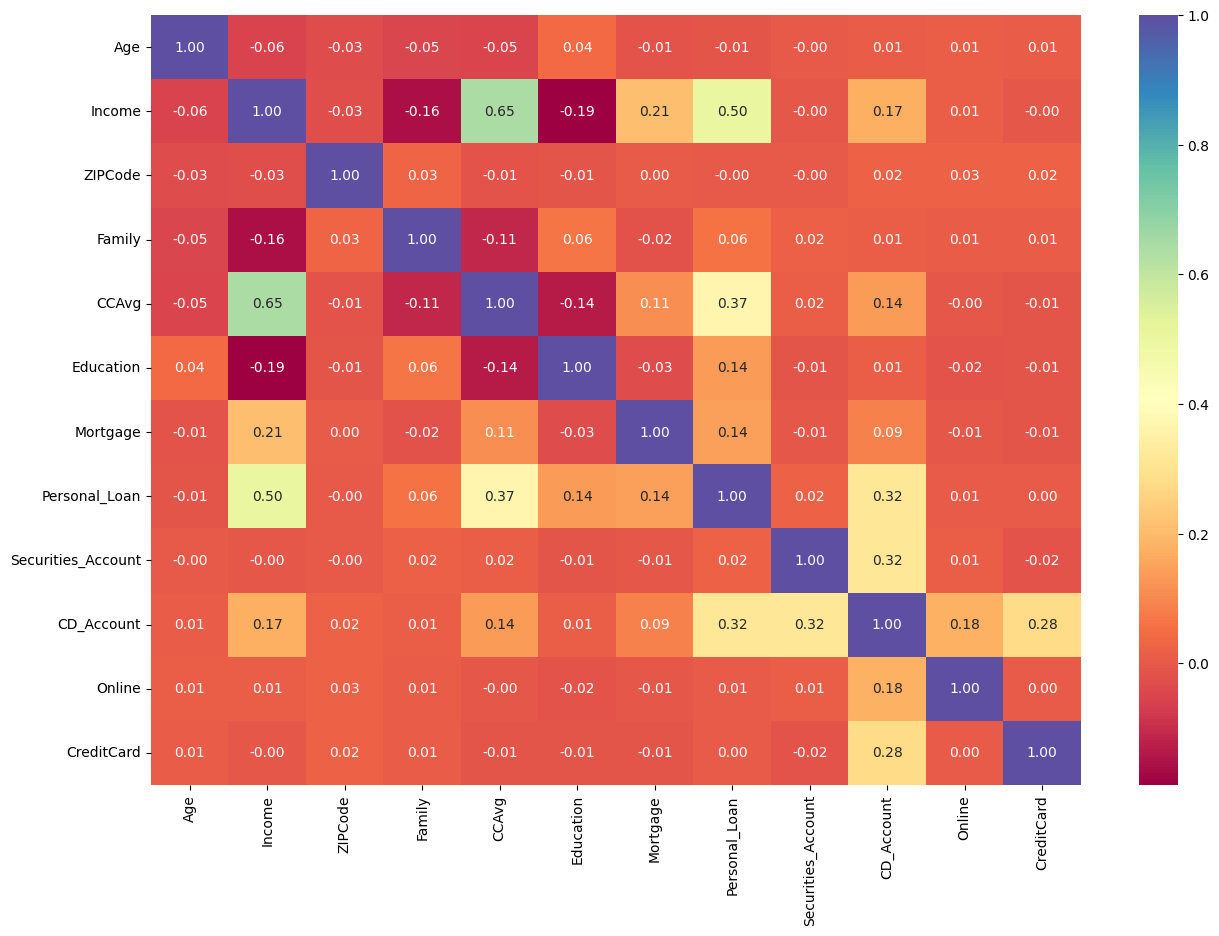

In [35]:
# Build correlation matrix for data and plot heatmap for that
#First drop ID, Experience from data to plot correlations
X=data.drop(['ID','Experience'],axis=1)
#increase fig size to 15, 10 to accommodate higher number of variables
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True, fmt=".2f",cmap='Spectral')

**Observations :**
1. *Personal loan has relatively better correlation to Income, Credit Card monthly spend, having a credit card with other banks, the mortgage amount, and level of education - in that order.  The rest of the variables do not seem to impact income as strongly.*
2. *Credit card spend has strong correlation to income.*
3. *Having a securities account has relatively strong correlation to having a CD account.*
4. *Having a CD account is also correlated to having a securities account, having other bank credit cards, spending more time in online banking, higher credit card spend, and higher income - in that order.*

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

1. Missing values - There are no missing values in the dataset
2. Feature engineering - One could potentially combine age and experience into a single variable but its not really needed here.
3.  Preparing data for modeling - since experience and age are perfectly correlated, one of them can be dropped.


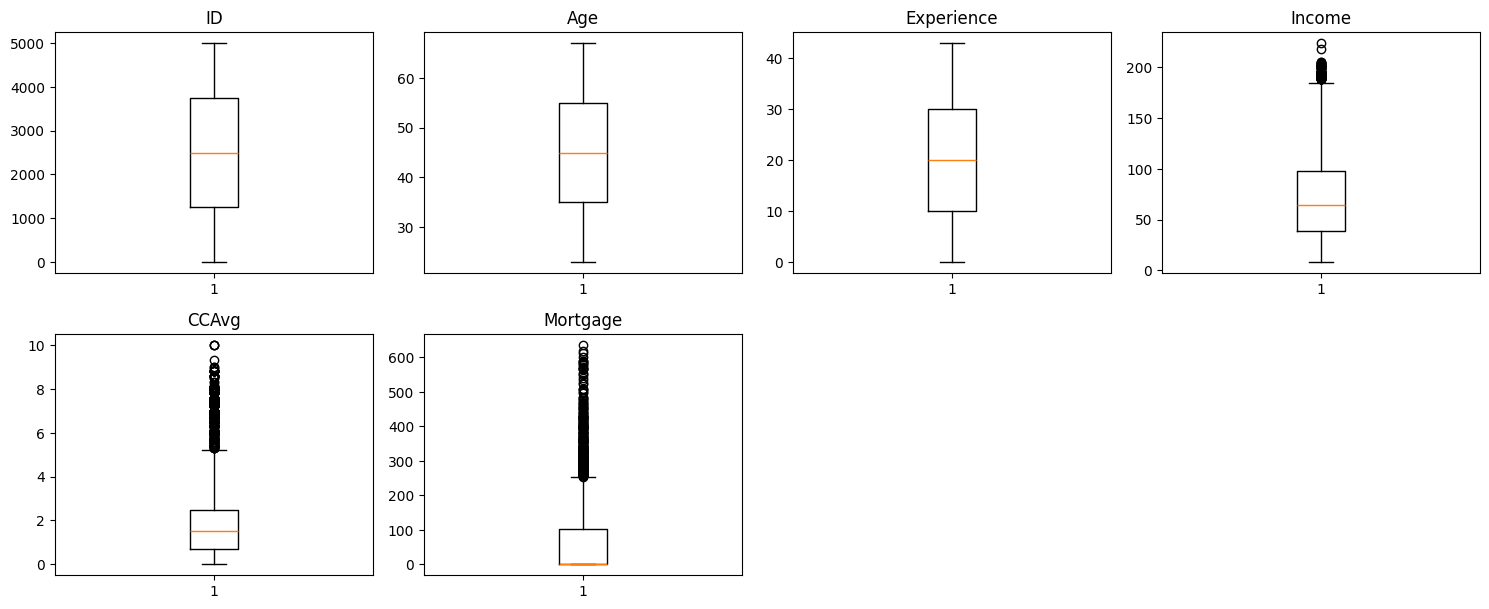

In [36]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation :**
1. *Outlier detection - None of the datasets and their outliers are outlandish or unbelievable.  Hence, we keep the data as is.*
2. *No treatment for outliners needed.*

## Model Building

In [37]:
#ID is redundant so remove that from base data
#Experience is perfectly correlated to Age so remove that
#Remove Prsonal Loan from data for independent variables, and add it to dependent variable
X=data.drop(['ID','Experience','Personal_Loan'],axis=1)
y=data['Personal_Loan']
#Create a separate dataset for logistic regression modeling
Xlog=X.copy()
ylog=y.copy()

# adding a constant to the independent variables for logsitic regression
Xlog = sm.add_constant(Xlog)


#Add Dummy variables for categorical variables in X
X = pd.get_dummies(X, drop_first=True)
Xlog = pd.get_dummies(Xlog, drop_first=True)

#Convert all columns in X to float
X = X.astype(float)
Xlog = Xlog.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
Xlog_train, Xlog_test, ylog_train, ylog_test = train_test_split(
    Xlog, ylog, test_size=0.20, random_state=42, stratify=y
)


In [38]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4000, 19)
Shape of test set :  (1000, 19)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


**Observation :**
1. *The stratify parameter ensures that the training and testing sets have the same proportion of classes as the original dataset.*

### Model Evaluation Criterion

**Observations :**
1. *This is a case where recall is more important than precision. The company would want to cast the net wider and send their marketing material to all potential customers, than send to a smaller set.  Hence, more false positives should be acceptable compared to more false negatives. So minimize false negatives.*
2.  *If, however, false positives become too high in an attempt to minimize false negatives, then we can either change the model or maximize f1 score instead.*

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    #Compute performance metrics
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [40]:
#Define a confusion matrix measurement function
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [41]:
#Instantiate a decision tree without restrictions
model0 = DecisionTreeClassifier(criterion = "gini", random_state=1)
#Fit the model to training data
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
#Determine performance of decision tree on training data on accuracy, precision, recall, and f1 scores
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Observations :**
1. *As expected, the default tree goes endlessely till it fits everything, hence it has perfect scores on training data set.*

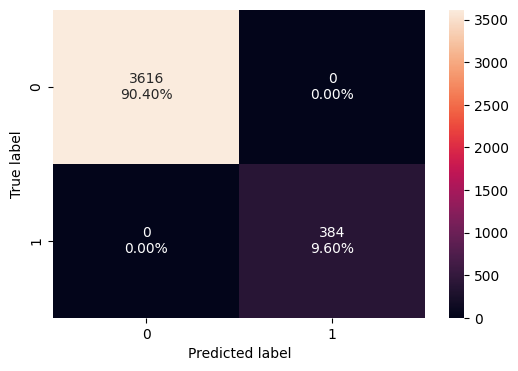

In [43]:
#Determine performance of decision tree on training data through confusion matrix computation
confusion_matrix_sklearn(model0, X_train, y_train)

**Observations :**

1. *The same perfect scores for training data get depicted in default tree confusion matrix as well*


In [44]:
#Determine performance of decision tree on test data on accuracy, precision, recall, and f1 scores
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

Accuracy    Recall  Precision    F1
0     0.982  0.947917      0.875  0.91

**Observation:**
1. *The accuracy is good for test data but not as good as training data*

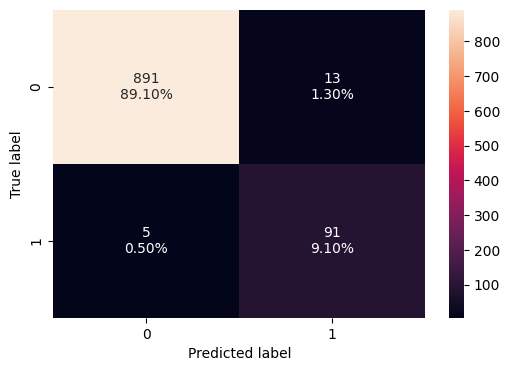

In [45]:
#Determine performance of decision tree on test data through confusion matrix computation
confusion_matrix_sklearn(model0, X_test, y_test)

**Observation:**
1. *The accuracy is good for test data but not as good as training data.  The model is not generalizing well.*
2.  *Both false positives and false negatives have marginally gone up.  In particular, we need to find if we can get better results through tree pruning.*

In [46]:
#Function to Visualize a Tree
def plot_tree(model, feature_names):
    # Generate plot
    plt.figure(figsize=(20, 10))
    out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
    for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
    plt.show()

    # Text report showing the rules of a decision tree -
    print(tree.export_text(model, feature_names=feature_names, show_weights=True))

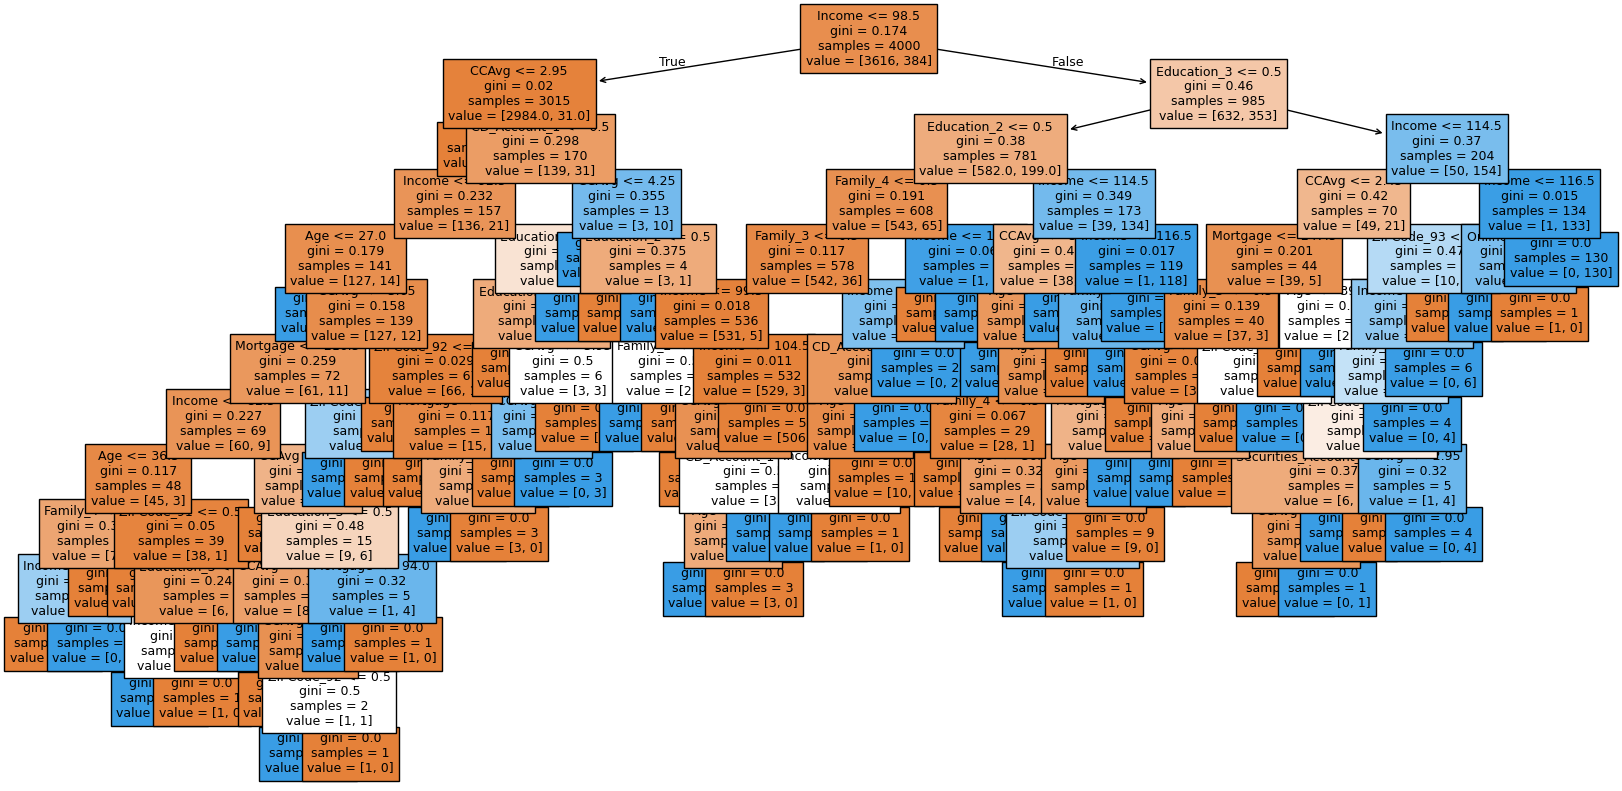

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 63.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Income >  63.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--

In [47]:
#Visualize the default tree
plot_tree(model0,list(X_train.columns))

**Observations**
1. *The default tree goes till high depth and high gini purity to get very pure leafs.  However, that could potentially capture a lot of noise alongwith the pattern.*

In [48]:
# Function to visualize and print the importances of a model in descending order
def hist_importances(model, feature_names):
    importances = model.feature_importances_
    print(pd.DataFrame(
        importances,columns=["Importances"],index=feature_names
        ).sort_values(by="Importances",ascending=False)
    )  #Print importances as a dataframe with each feature's importance in descending order

    indices = np.argsort(importances) #sort importance indices to plot them in descending order

    #Plot the importance function as a horizontal barchart
    plt.figure(figsize=(8, 8))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()


                      Importances
Income                   0.414501
Education_2              0.179967
Education_3              0.123182
Family_4                 0.072539
CCAvg                    0.067215
Family_3                 0.064456
Age                      0.025159
CD_Account_1             0.018361
Mortgage                 0.010548
ZIPCode_93               0.005620
ZIPCode_94               0.005562
Family_2                 0.005041
ZIPCode_91               0.002258
Online_1                 0.002161
Securities_Account_1     0.001852
ZIPCode_92               0.001577
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard_1             0.000000


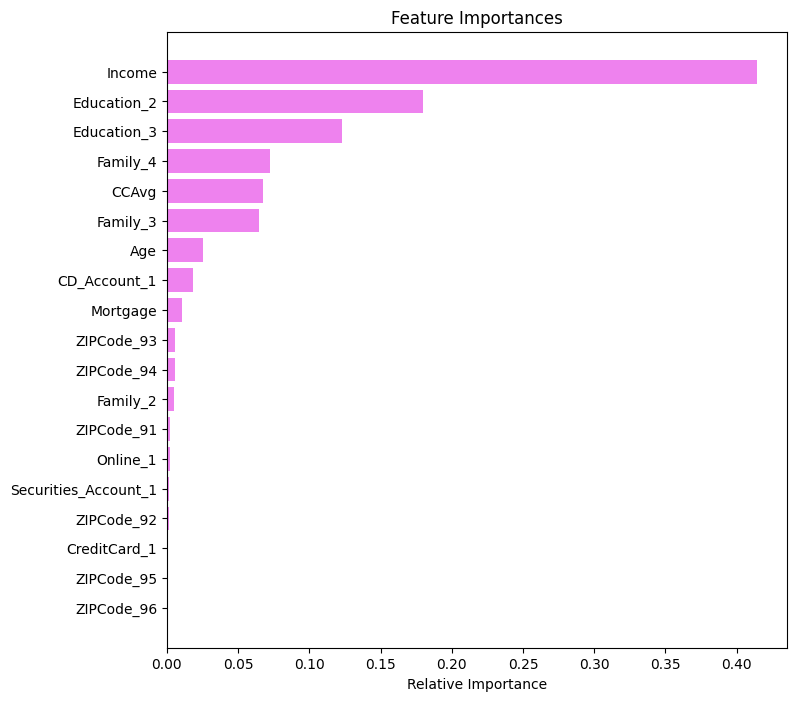

In [49]:
##Visualize the importances of the default model
hist_importances(model0,list(X_train.columns))

**Observations:**
1. *For the default tree, the important features are income, education, family size, credit card score, age, and having a CD account, in that order.*
2. *Income forms the root node in this case.*
3. *Low importance of zipcodes, securities account, mortgage, credit card with other banks, and online banking to predict loan acceptance performance.*

### Decision Tree (with class_weights)
* Since the no loan class is dominant over the loan class, setting class weights to balanced will adjust the weights inveserly to frequencies and will balance the tree better

In [50]:
#Instantiate a model with class weights as balanced to remove dominance of one class
model1 = DecisionTreeClassifier(criterion = "gini", random_state=1, class_weight="balanced")
#Fit this model on training data
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [51]:
#Determine performance of balanced tree on training data for accuracy, precision, recall, and f1 score
bal_decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
bal_decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

**Observations:**
1. *As expected, the model still fits the training data perfectly.*

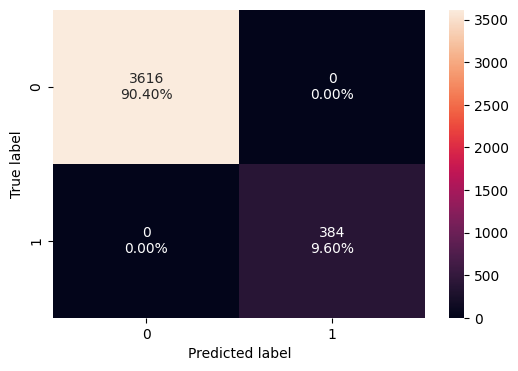

In [52]:
#Determine performance of this tree in confusion matrix terms for training data
confusion_matrix_sklearn(model1, X_train, y_train)

**Observations:**
1. *Same perfect scores with zero errors for the training data get depicted in the confusion matrix as well.*

In [53]:
#Determine performance of balanced tree on test data for accuracy, precision, recall, and f1 score
bal_decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
bal_decision_tree_perf_test

Accuracy  Recall  Precision        F1
0     0.978  0.9375   0.849057  0.891089

**Observations**:
1. *The balanced tree still performs worse on the test data.  The model will not generalize well if the model is not pruned.*

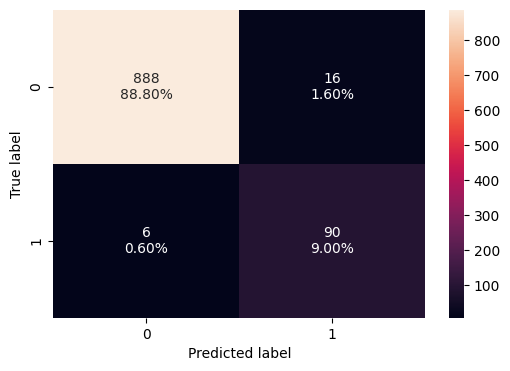

In [54]:
#Determine performance of this tree in confusion matrix terms for test data
confusion_matrix_sklearn(model1, X_test, y_test)

**Observations**:
1. *The model for test data is worse than training data.  Will not generalize well.  Need to prune the tree.*

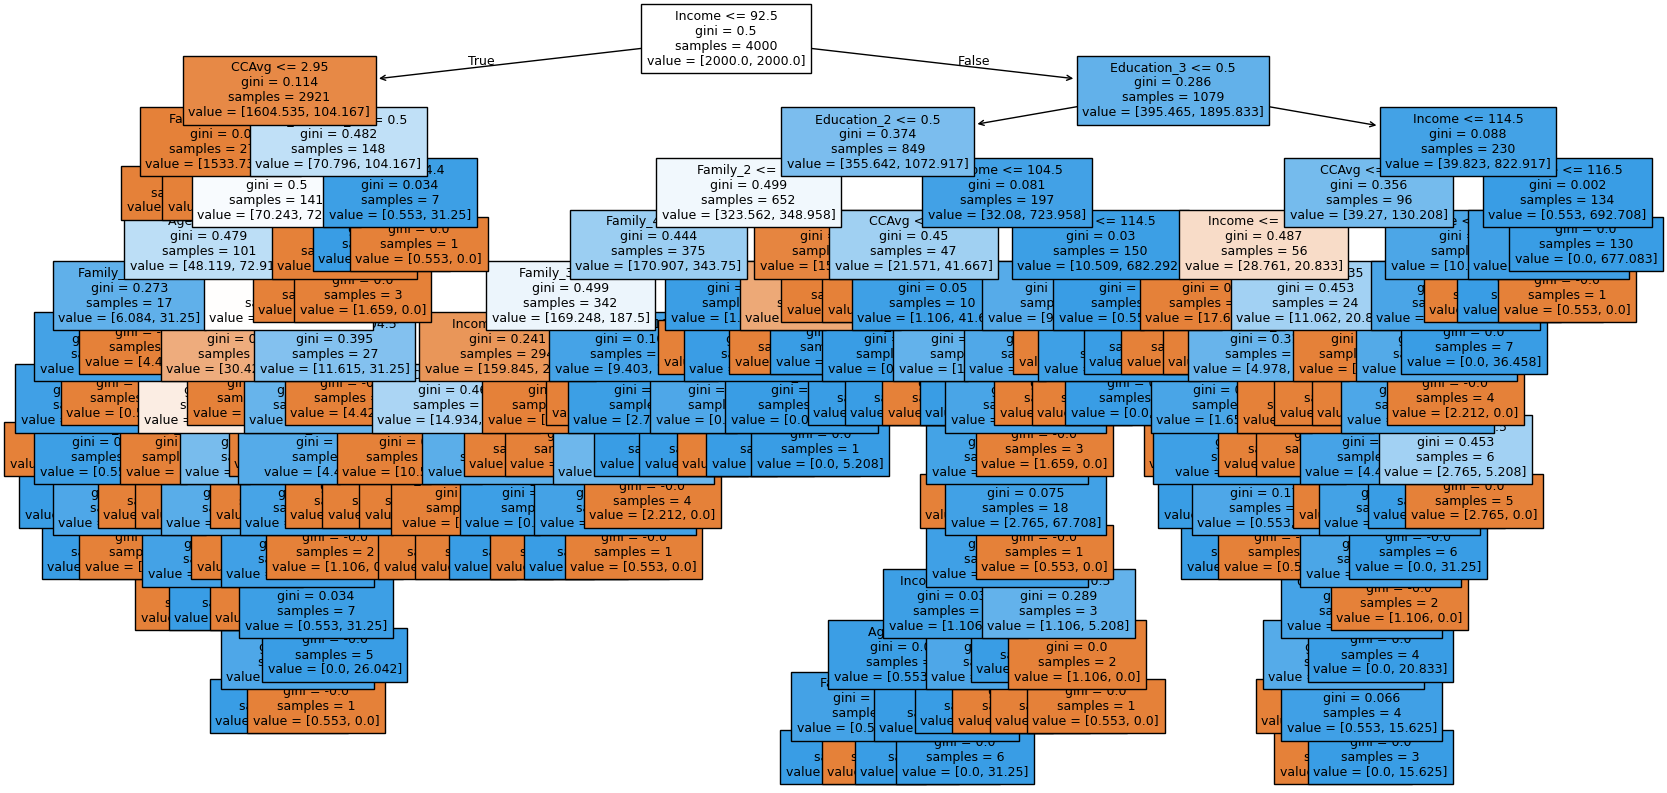

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Family_2 <= 0.50
|   |   |   |--- weights: [1198.56, 0.00] class: 0
|   |   |--- Family_2 >  0.50
|   |   |   |--- weights: [335.18, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- Income <= 91.50
|   |   |   |   |   |   |   |--- Income <= 59.00
|   |   |   |   |   |   |   |   |--- weights: [0.55, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  59.00
|   |   |   |   |   |   |   |   |--- CreditCard_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 26.04] class: 1
|   |   |   |   |   |   |   |   |--- CreditCard_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 85.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 5.21] class: 1
|   |   |   |   |   |   |   |   |   |--- Income >  85.50
|   |   |   |   |   |   |   |   |   |   |

In [55]:
#Visualize the class_weighted default tree
plot_tree(model1,list(X_train.columns))

**Observations:**
1. *The balanced tree but with default hyperparameters still goes on iterating till high depth, and low sample sizes for the leaf.*
2. *It potentially still captures a lot of noise and not just the pattern.*

                      Importances
Income                   0.631571
CCAvg                    0.103307
Education_2              0.068495
Family_3                 0.059735
Family_2                 0.048701
Family_4                 0.029050
Education_3              0.022121
Age                      0.013614
CD_Account_1             0.005829
Mortgage                 0.004458
ZIPCode_95               0.003235
CreditCard_1             0.002672
ZIPCode_92               0.002041
Securities_Account_1     0.001849
Online_1                 0.001660
ZIPCode_93               0.001127
ZIPCode_91               0.000534
ZIPCode_96               0.000000
ZIPCode_94               0.000000


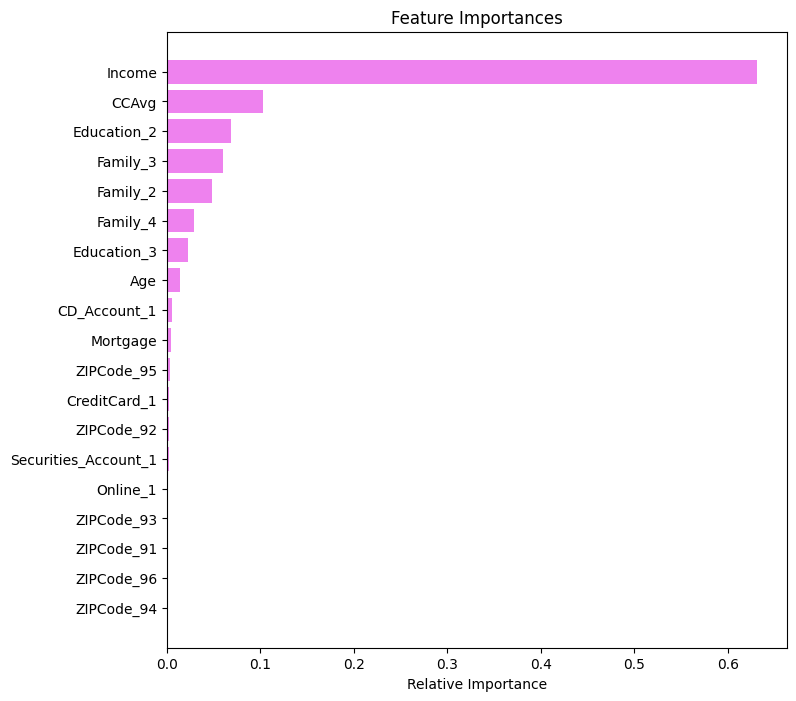

In [56]:
##Visualize the importances of the class_weighted default model
hist_importances(model1,list(X_train.columns))

**Observations**:
1. *In this model, the importance of parameters moves from Income to Credit card spend to education, family, age, and having a CD account.  The importance of credit card spend and family size has moved up in this case.*
2. *Income level of 92.5k still stays the root node of the tree.*
3. *Importance of zipcodes, securities account, mortgage, credit card with other banks, and online banking all continue to be low.*

## Model Performance Improvement

**Pre-Pruned Tree Formation**

In [57]:
# Define the hyperparameters of the tree to iterate over
max_depth_values = np.arange(2, 10, 1)
min_samples_leaf_values = [2,5,8,10,20]
min_samples_split_values = [10, 30, 50, 70]
max_leaf_nodes_values = np.arange(10,100,5)
min_impurity_decrease=[0.00,0.01,0.02,0.03,0.04,0.05]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0


# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for min_samples_leaf_value in min_samples_leaf_values:
        for min_samples_split in min_samples_split_values:
          for max_leaf_nodes in max_leaf_nodes_values:
            for i in range(len(min_impurity_decrease)):
            # Create a decision tree classifier with the current parameter values

            # Initialize the tree with the current set of parameters
                estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf_value,
                min_samples_split=min_samples_split,
                max_leaf_nodes=max_leaf_nodes,
                min_impurity_decrease=min_impurity_decrease[i],
                criterion='gini',
                class_weight='balanced',
                random_state=42
                )

                # Fit the model to the training data
                estimator.fit(X_train, y_train)

                # Make predictions on the training and test sets
                y_train_pred = estimator.predict(X_train)
                y_test_pred = estimator.predict(X_test)

                # Calculate recall scores for training and test sets
                train_recall_score = recall_score(y_train, y_train_pred)
                test_recall_score = recall_score(y_test, y_test_pred)

                # Calculate the absolute difference between training and test recall scores
                score_diff = abs(train_recall_score - test_recall_score)

                # Update the best estimator and best score if the current one has a smaller score difference
                #minimize difference between test and train data, AND maximize recall score
                #This is maximize recall case, since false negatives need to be minimized while more false positive are acceptable
                if ((score_diff < best_score_diff) and (test_recall_score > best_test_score)):
                    best_score_diff = score_diff
                    best_test_score = test_recall_score
                    best_estimator = estimator

In [58]:
# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Min sample leaf values: {best_estimator.min_samples_leaf}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Min impurity decrease: {best_estimator.min_impurity_decrease}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Min sample leaf values: 2
Max leaf nodes: 10
Min samples split: 10
Min impurity decrease: 0.0
Best test recall score: 1.0


**Observations:**
1. The tree is able to compute high recall value for a very simple tree depth, with the chosen hyperparameters.

###Pre-Pruning

In [59]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=np.int64(10), min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [60]:
#Find performance of this model
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision        F1
0   0.78925     1.0   0.312958  0.476723

**Observations:**
1. *A very simple tree with depth of 2 is showcasing high recall on training data.  Since this is the best model, it is expected to have good recall on test data also.*

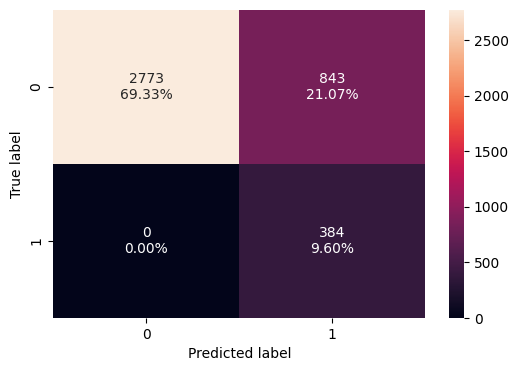

In [61]:
#Check performance of best pre-pruned tree on training data through confusion matrix
confusion_matrix_sklearn(model2, X_train, y_train)

**Observations:**
1. *In an attempt to minimize false negatives, the precision score has reduced.  The model has a lot of false positives for training data.*
2. *However, it has high recall value so it could be quite useful.*

In [62]:
#Measure performance of this pre-pruned model on test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy  Recall  Precision        F1
0     0.778     1.0   0.301887  0.463768

**Observations**:
1. *The model is showing similarly high recall for test data.  Results for other accuracy scores like precision and F1 are comparable to train data also.*

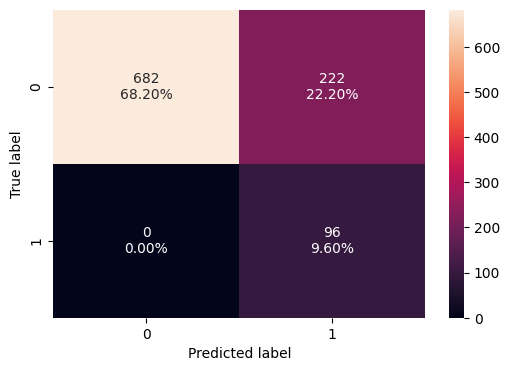

In [63]:
#Measure performance of the new model on test data through confusion matrix
confusion_matrix_sklearn(model2, X_test, y_test)

**Observations**:
1. *The model has similar precision and accuracy for test data compared to training data.*
2.  *It is generalizing well with minimal difference in test and training results.*
3. *If model simplicity is desired, then this model is a good candidate. It has high recall value, low computation requirement, and intuitive to understand.*

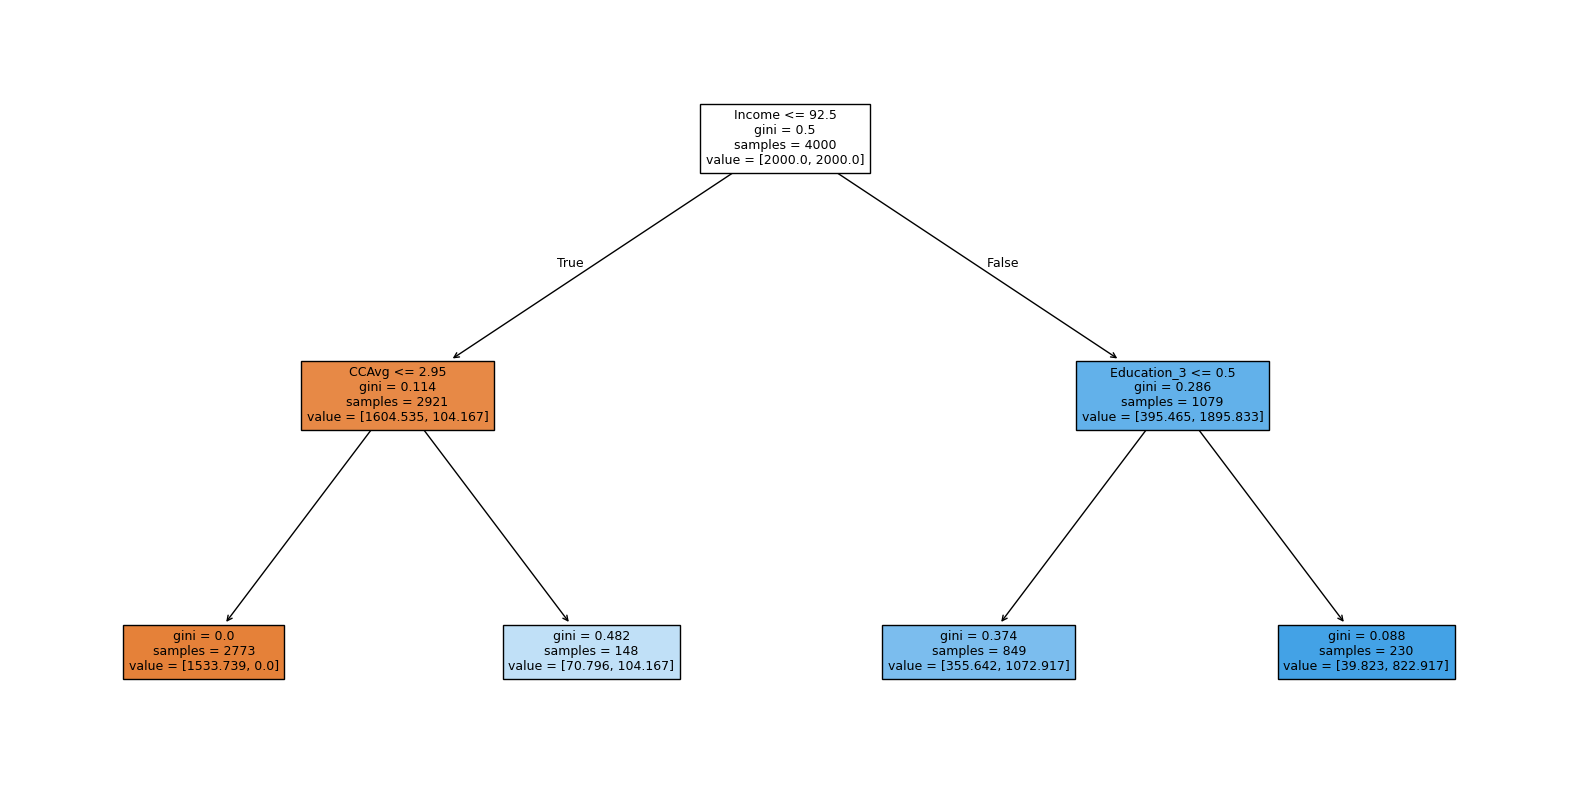

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1533.74, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [70.80, 104.17] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- weights: [355.64, 1072.92] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [39.82, 822.92] class: 1



In [64]:
#Visualize the class_weighted best score pre-pruned tree
plot_tree(model2,list(X_train.columns))

**Observations:**
1. *Simply income and credit card spend criteria lead to high Gini values and recall for a very simple tree.*
2. *Despite iterating over many other hyperparameters including tree depths, node samples and leaf samples etc., the tree is not able to find any better recall scores and generalization compared to this simple tree.*

                      Importances
Income                   0.880833
CCAvg                    0.085279
Education_3              0.033888
Age                      0.000000
Mortgage                 0.000000
ZIPCode_92               0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
ZIPCode_93               0.000000
Family_2                 0.000000
Family_3                 0.000000
Family_4                 0.000000
Education_2              0.000000
Securities_Account_1     0.000000
CD_Account_1             0.000000
Online_1                 0.000000
CreditCard_1             0.000000


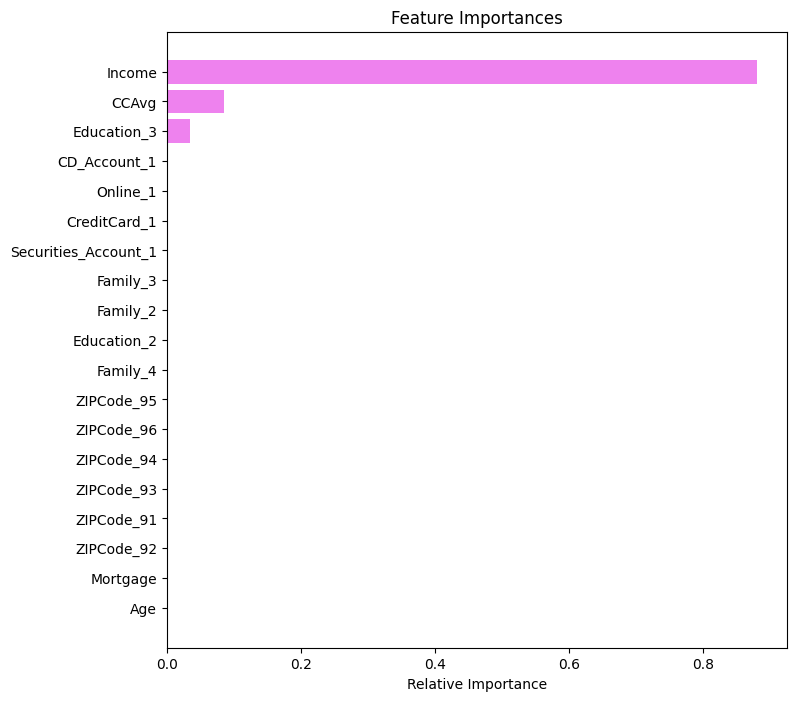

In [65]:
##Visualize the importances of the class_weighted best score pre-pruned tree
hist_importances(model2,list(X_train.columns))

**Observations:**
1. *Income, credit card spend and education become the most important parameters in the pre-pruned tree.  All other parameters do not have much significance to increase recall score.*
2. *As per the best-score pre-pruned model, simply check for Income.  Send marketing message to all customers with income above 92.5k.  For customers whose income is below 92.5k, look for customers with average monthly credit card spend above 2.95k.  In either of these cases, we should send our marketing messages to such prospects.  If neither the income, nor credit card spend criteria are met, we could leave out such customers.  This approach will potentially generate all the true positives, true negatives.  It will generate many false positives, but will generate no or minimal false negatives.  Thus, we will not miss out on potential prospects.*

###**Post-Pruning**


In [66]:
#Instantiate clf to determine pruning path, and cost-complexity alphas
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced",criterion="gini")
path = clf.cost_complexity_pruning_path(X_train, y_train) #determine pruning path for training fit tree
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities #determine cost-complexity alphas and impurities

In [67]:
#convert the path to dataframe
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -9.388743e-17
1   9.210921e-20 -9.379532e-17
2   1.473747e-18 -9.232157e-17
3   3.035766e-18 -8.928581e-17
4   3.546205e-18 -8.573960e-17
5   4.144915e-18 -8.159469e-17
6   4.421242e-18 -7.717345e-17
7   5.204170e-18 -7.196928e-17
8   7.875338e-18 -6.409394e-17
9   9.963146e-18 -5.413079e-17
10  1.257675e-17 -4.155405e-17
11  1.915872e-16  1.500331e-16
12  2.011051e-16  3.511382e-16
13  4.682679e-16  8.194061e-16
14  1.346983e-04  2.693966e-04
15  1.358696e-04  8.128748e-04
16  1.358696e-04  1.084614e-03
17  1.358696e-04  1.356353e-03
18  1.377866e-04  1.631926e-03
19  1.381500e-04  1.908226e-03
20  1.381640e-04  2.184554e-03
21  2.580380e-04  2.700630e-03
22  2.616681e-04  3.485635e-03
23  2.624489e-04  3.748084e-03
24  2.626050e-04  4.010689e-03
25  2.626050e-04  4.273294e-03
26  2.670940e-04  4.540388e-03
27  2.693966e-04  5.079181e-03
28  2.707972e-04  5.349978e-03
29  2.717391e-04  5.621717e-03
30  3.286678e-04  6.936388e-03
31  4.530438e-04  7.389432e-03
32  4.949122e-04  7.884344e-03
33  4.988698e-04  8.383214e-03
34  4.990461e-04  8.882260e-03
35  5.026506e-04  9.384911e-03
36  5.427404e-04  9.927651e-03
37  5.434304e-04  1.264480e-02
38  5.453550e-04  1.319016e-02
39  5.484266e-04  1.428701e-02
40  7.255061e-04  1.501252e-02
41  7.805943e-04  1.735430e-02
42  9.049266e-04  1.825923e-02
43  9.846774e-04  1.924390e-02
44  1.240486e-03  2.048439e-02
45  1.259124e-03  2.300264e-02
46  1.310704e-03  2.562405e-02
47  1.311209e-03  2.693526e-02
48  1.603788e-03  2.853904e-02
49  1.620277e-03  3.015932e-02
50  1.758481e-03  3.191780e-02
51  1.917257e-03  3.575232e-02
52  2.428175e-03  3.818049e-02
53  2.854426e-03  4.103492e-02
54  3.083150e-03  4.411807e-02
55  3.154299e-03  5.042667e-02
56  3.940682e-03  5.830803e-02
57  4.822859e-03  6.795375e-02
58  6.451189e-03  7.440494e-02
59  2.030797e-02  1.150209e-01
60  2.321960e-02  1.846797e-01
61  2.783339e-02  2.125131e-01
62  2.874869e-01  5.000000e-01

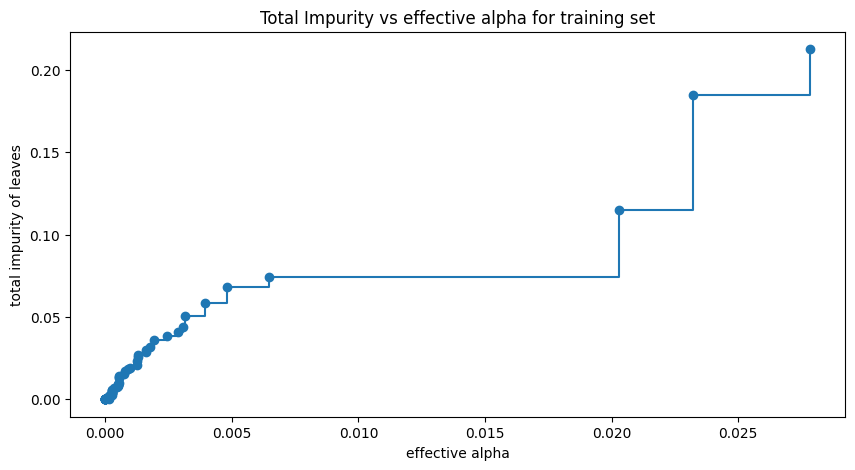

In [68]:
#Plot scatterplot of impurities versus alphas
fig, ax = plt.subplots(figsize=(10, 5)) #set figure size
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post") #omit the last alpha as it is associated with the trivial tree of node 1 (only the root node)
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observations** :
1. *At alpha values of about 0.003 to 0.004, impurities start having bigger jump.  At alpha near 0.020, the impurities jump again.  So potentially best to cut only till that alpha value or that tree-depth.*

In [69]:
#train a decision tree using different alpha value hyperparameter
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced",criterion="gini"
    )
    clf.fit(X_train, y_train)#train a set of trees with different alpha values, going from low alphas to higher alphas
    clfs.append(clf) #Add all such models to a list
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
     )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.28748693032939887


**Observations :**
1. *The last model can be omitted as that is the trivial tree with just one node.*

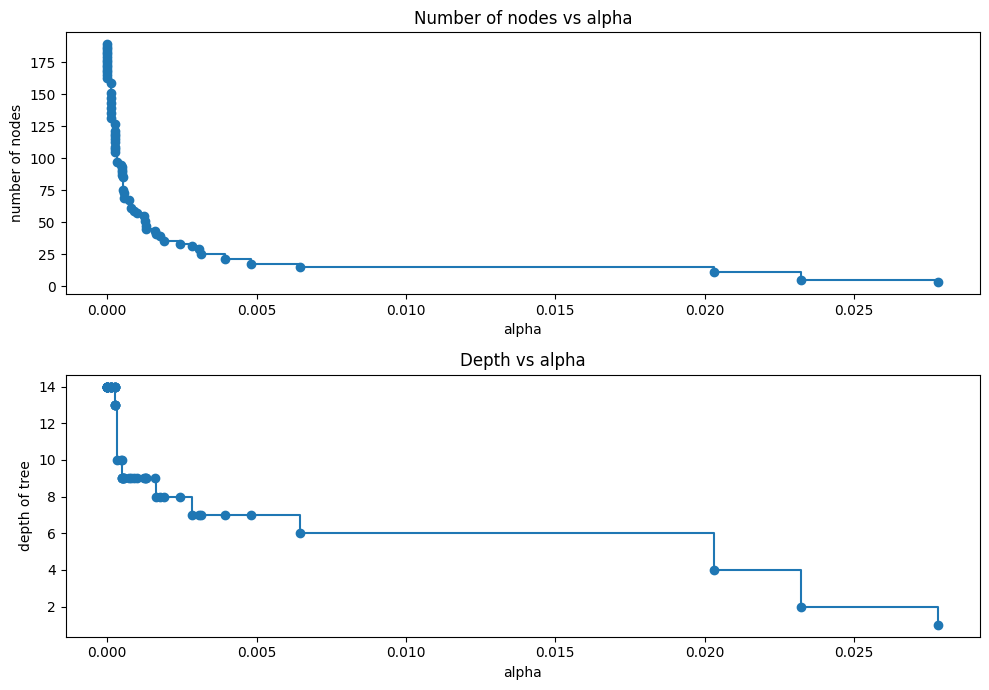

In [70]:
#Plot the number of nodes and tree-depth versus alpha
clfs = clfs[:-1] #leave out the model associated with the last alpha.  as that is a trivial tree node
ccp_alphas = ccp_alphas[:-1] #leave out the alpha associated with last node

node_counts = [clf.tree_.node_count for clf in clfs] #number of nodes with different models
depth = [clf.tree_.max_depth for clf in clfs] #depth of different models
#plot number of nodes as a function of alpha
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
#plot tree-depth as a function of alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations:**
1. *Number of nodes shoots up with reduction of alpha below 0.004.  *
2. *At a depth of about 7, the alpha reduces to 0.004.  The incremental reduction in alpha is marginal post this point, with further addition of nodes or depth.*
3. *Even beyond alpha pf 0.020, a high depth has only marginal improvement in alpha value.*

In [71]:
#Get the list of recall values for different alpha values of training data
recall_train = [] #initiate the list of recall values
for clf in clfs:
    pred_train = clf.predict(X_train) #use clf model values one by one to get predicted values of training data for that model
    values_train = recall_score(y_train, pred_train) #get recall score for that model
    recall_train.append(values_train) #append the score to list

In [72]:
#Get the list of recall values for different alpha values of test data
recall_test = [] #initiate the list of recall values
for clf in clfs:
    pred_test = clf.predict(X_test) #use clf model values one by one to get predicted values of test data for that model
    values_test = recall_score(y_test, pred_test) #get recall score for that model
    recall_test.append(values_test) #append the score to list


In [73]:
#Get the accuracy scores for each of the models for training data and test data
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]


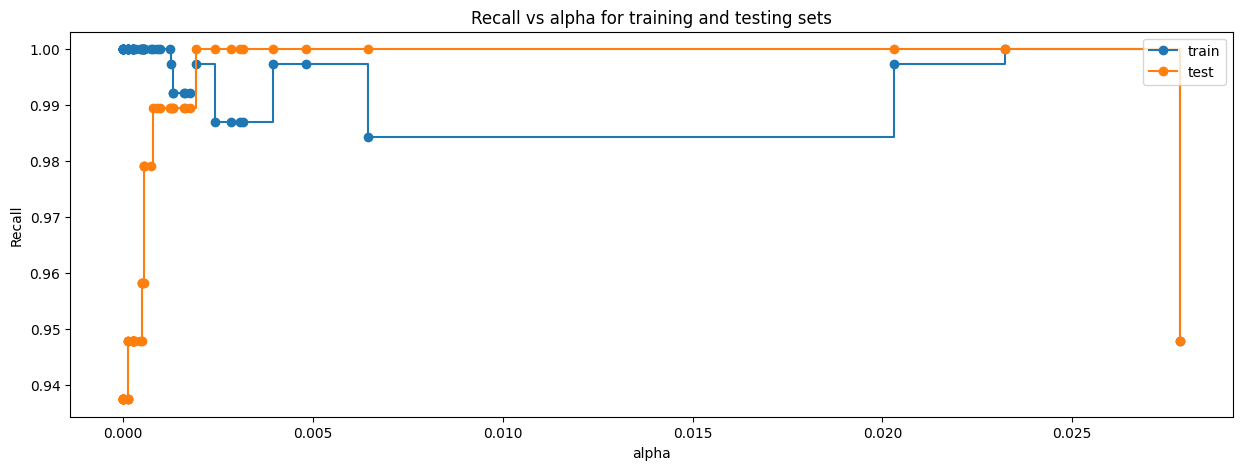

In [74]:
#Plot recall values of training data and test data against alpha scores for each model
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observation:**
1. *At alpha values of 0.002, 0.003, 0.005, 0.006,0.020, 0.021 test recall is at its maximum and train test data are close.  Thus, one of these values of alpha should get chosen.*
2. *Since alpha at 0.020 will imply lower depth and lower compute power, lower compute time, while keeping the recall highest, optimum value of alpha is 0.020.*

In [75]:
# creating the model where we get highest test recall, and closest training and test data values
#index_best_model = np.argmax(recall_test)
index_best_model = 0 #initialize index
max_recall=recall_test[0] #Get recall test value for that index
max_train=recall_train[0] #Get recall train value for that index
best_diff=abs(max_recall-max_train) #Get their absolute difference
for i in range(len(recall_test)):
  if ((recall_test[i] >max_recall) and (abs(recall_test[i]-recall_train[i])<best_diff)):
    index_best_model=i
    max_recall=recall_test[i] #Replace index with new index if this has better test recall and generalizes better

best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0019172570951078794),
                       class_weight='balanced', random_state=1)


**Observation:**

1. *The best model post pruned tree has alpha of 0.0019*

In [76]:
#Check performance of best model post-pruned tree
model3 = best_model
decision_tree_post_prune_train = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_post_prune_train #Get accuracy scores for the post-pruned tree for training data

Accuracy    Recall  Precision        F1
0    0.9585  0.997396   0.698905  0.821888

**Observations:**
1. *The best model has recall score of 0.997 on training data, while not so good a score on precision.*
2.  *However, the precision is much better than in the pre-pruned tree model.*

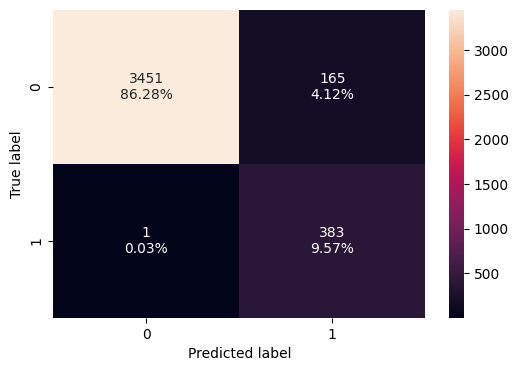

In [77]:
#Get confusion matrix for the best model for training data
confusion_matrix_sklearn(model3, X_train, y_train)

**Observations**:
1. *Just like the pre-pruned tree, the model on training data has near-perfect recall score, ie, perfect true positives and zero false negatives.*
2.  *Important to note that the model has much lower proportion of false positives than the pre-pruned model.*


In [78]:
#Check performance of best model post-pruned tree on test data
decision_tree_post_prune_test = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_post_prune_test #Get accuracy scores for the post-pruned tree for test data

Accuracy  Recall  Precision   F1
0     0.952     1.0   0.666667  0.8

**Observations:**
1. *The model has perfect recall score on test-data.*
2.  *The precision and F1 scores match the fit of training data. Thus, the model is generalizing well.*
3. *However, just as in the pre-prune model, the precision score, and F1 has deteriorated quite a bit.*

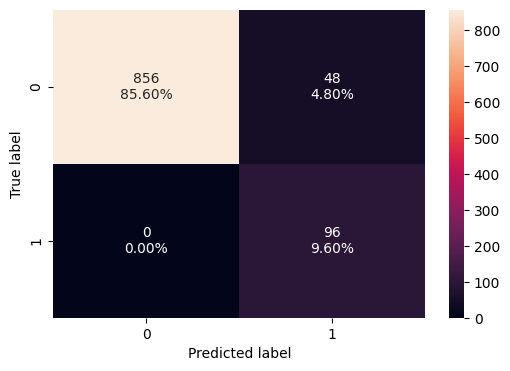

In [79]:
#Get confusion matrix for the best model for test data
confusion_matrix_sklearn(model3, X_test, y_test)

**Obsrevations:**
1. *Just as in the pre-prune model, the false negatives are minimized to zero for test data.*
2. *The false positives are increased to 4.8%, which is much lesser than in the case of pre-prune model.*
3. *The overall model accuracy is therefore much better than the pre-pruned model.*

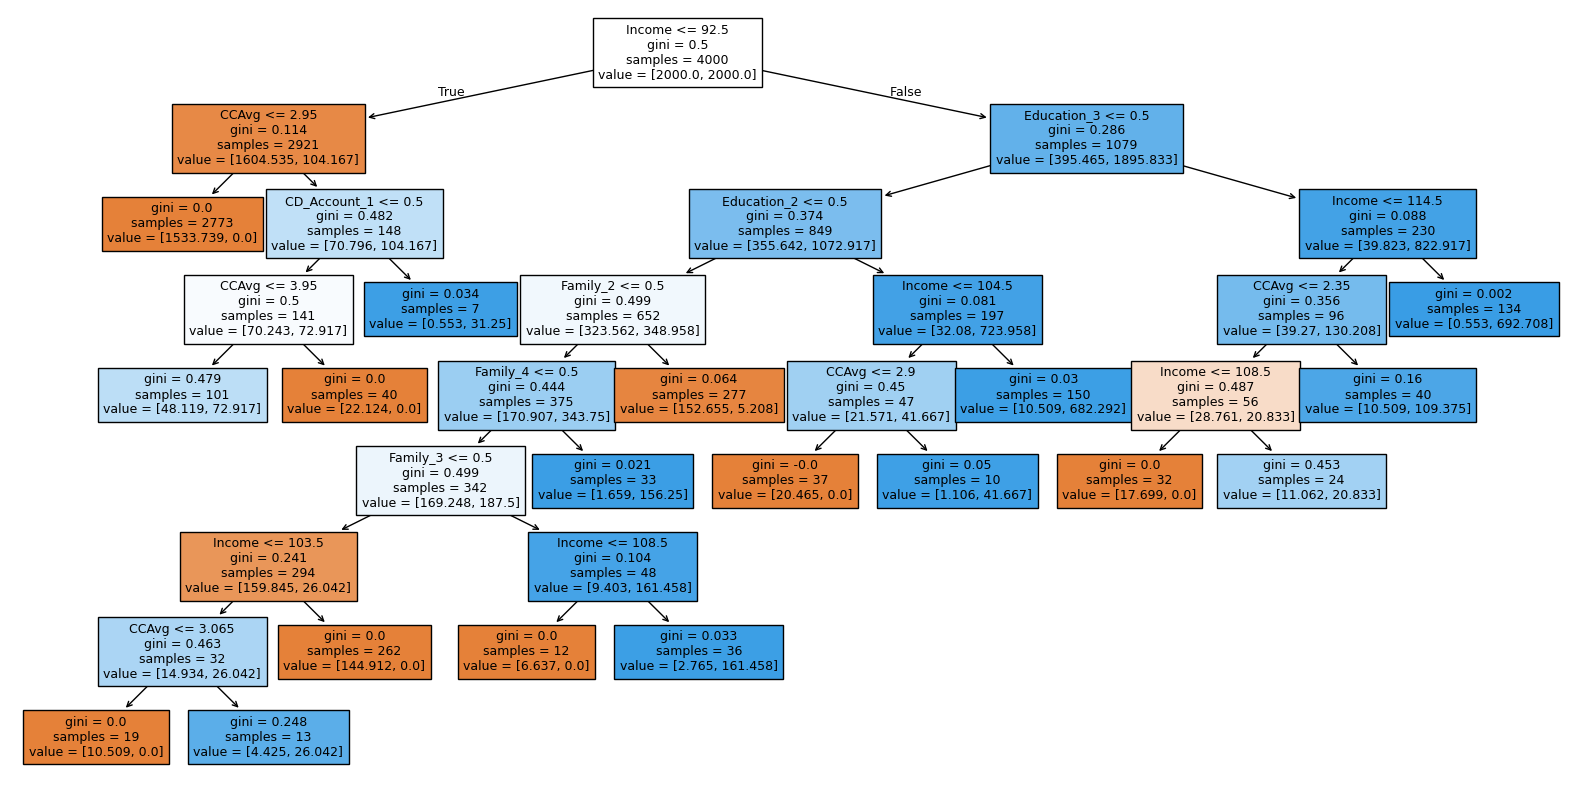

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1533.74, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [48.12, 72.92] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [22.12, 0.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [0.55, 31.25] class: 1
|--- Income >  92.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_2 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.06
|   |   |   |   |   |   |   |   |--- weights: [10.51, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.06
|   |   |   |   |   |   |   |   |--- weights: [4.42, 26.04] class: 1
|   |   |   |   |   |   |--- Income >  103.50
|   |   |   |   |   |   |   |--- weights: [144.91, 0.00] class: 0
|   |   |   |

In [80]:
#Visualize the post pruning best model tree
plot_tree(model3,list(X_train.columns))

**Observations**:
1. *The tree provides a little more complex rulset for ascertaining loan acceptance.*
2. *The criteria for decline are : Low income and low credit card spend; low income, high credit card spend, and no CD account; moderate income, low education, and small family size, and some other combinations of these.*
3. *In general, high or moderate income, higher education, bigger family size, higher credit card spend tend to favor loan acceptance for this model as well.*

                      Importances
Income                   0.659472
CCAvg                    0.096716
Education_2              0.073770
Family_3                 0.062117
Family_2                 0.052452
Family_4                 0.025371
Education_3              0.023824
CD_Account_1             0.006277
Age                      0.000000
ZIPCode_92               0.000000
Mortgage                 0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
ZIPCode_91               0.000000
Securities_Account_1     0.000000
Online_1                 0.000000
CreditCard_1             0.000000


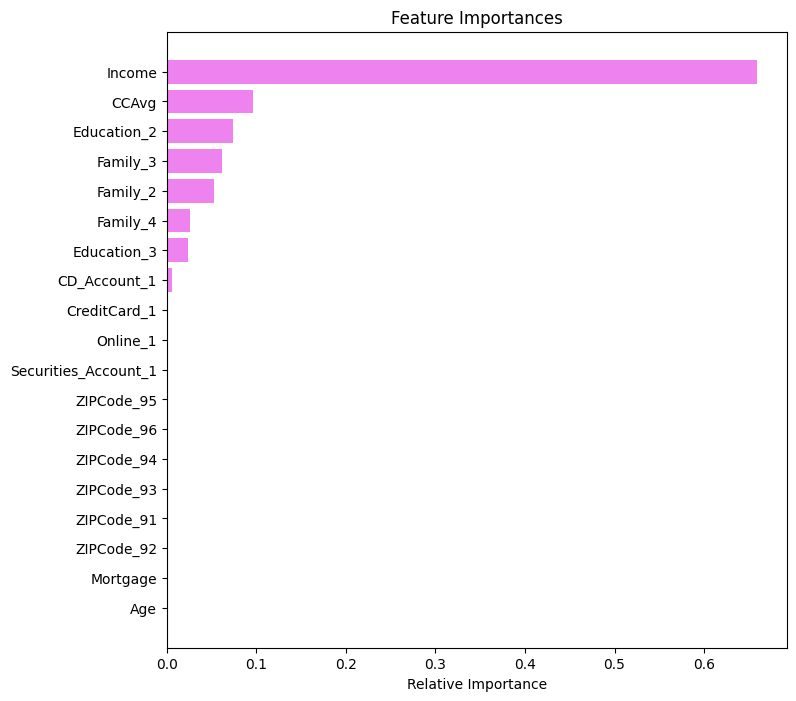

In [81]:
##Visualize the importances of the best score post-pruned tree
hist_importances(model3,list(X_train.columns))

**Observations:**
1. *In the post prune case, the most important parameters continue to be income and credit card spend.  Family size, education level, and having a CD account are the next set of important factors.*
2. *Having credit cards with other banks, online banking, having a securities account, living in different zip codes, having a mortgage account, and age are factors that do not have much bearing on loan propensity.*
3. *Income of 92.5k and monthly credit card spend of 2.95k continue to be the most important filters.*
4. *Rough screening criteria per this tree are:*
  *a) Check for income; if low, check for credit card spend; if that is also low, then do not market to them.  If credit card spend is high, but CD account exists, market loan offer to them.*
  *b) If income is high, but credit card spend is low, then loan acceptance is dependent upon level of education and family size.*

## Model Performance Comparison and Final Model Selection

In [82]:
# performance comparison of training data for all the trees

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        bal_decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_prune_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.789250                      0.958500  
Recall                        1.000000                      0.997396  
Precision                     0.312958                      0.698905  
F1                            0.476723                      0.821888

**Observations:**
1. *For training data, the best fit seems to be the post pruning tree as it has high recall, but also has high precision, thus reducing false positives and reducing compute power.*



In [83]:
# performance comparison of test data for all the trees
models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        bal_decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_prune_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.982000                         0.978000   
Recall                            0.947917                         0.937500   
Precision                         0.875000                         0.849057   
F1                                0.910000                         0.891089   

           Decision Tree (Pre-Pruning)  Decision Tree (Post-Pruning)  
Accuracy                      0.778000                      0.952000  
Recall                        1.000000                      1.000000  
Precision                     0.301887                      0.666667  
F1                            0.463768                      0.800000

**Observations:**
1. *For testing data also, the algorithm for post-pruning tree produces not only perfect recall score, but also a relatively high precision score.*
2. *Thus, if compute costs are not an issue, then the post-prune model is a superior model for this classification problem.*

**###Model Building Using Logistic Regression**

In [84]:
print("Shape of Training set : ", Xlog_train.shape)
print("Shape of test set : ", Xlog_test.shape)
print("Percentage of classes in training set:")
print(ylog_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(ylog_test.value_counts(normalize=True))

Shape of Training set :  (4000, 20)
Shape of test set :  (1000, 20)
Percentage of classes in training set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


**Observations:**
1. *The function stratify ensures that the class is equally distributed between the training and test data.*
2. *In all, 9.6% of the customer population opted for the personal loan.*

In [85]:
# fitting logistic regression model
logit = sm.Logit(ylog_train, Xlog_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3980
Method:                           MLE   Df Model:                           19
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6413
Time:                        01:37:52   Log-Likelihood:                -453.64
converged:                       True   LL-Null:                       -1264.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.5745      0.755    -16.661      0.000     -14.054     -11.095
Age                      0.0043      0.008      0.548      0.584      -0.011       0.020
Income      

**Observations:**

1. *The significant variables of the data are Income, Credit card monthly spend, Family size of 3 or 4, Education of graduate or professional executive, having a securities account, having a CD account, carrying out online banking, and possessing a credit card from other banks.*

2. *Having a securities account, having online presence, and having another bank's credit card are all negatively correlated.  In other words, for customers with these attributes, the propensity to take personal loan is low.*

3. *All other variables are positively correlated.  Thus, having higher income, higher credit card spend, higher family size or education, or having a CD account increase the propensity to get loan or be accepted for a loan.*

###Logistic Regression Model Performance Evaluation


In [86]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [87]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

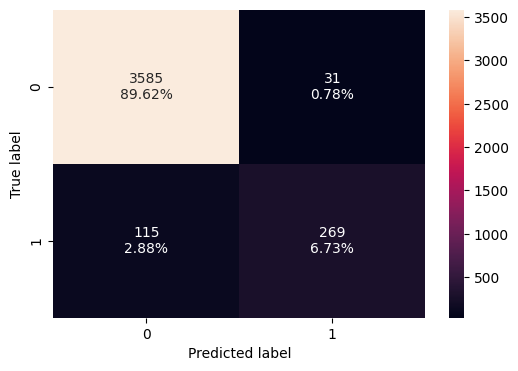

In [88]:
confusion_matrix_statsmodels(lg, Xlog_train, ylog_train)

**Observations:**
1. *A threshold for 0.5 produces a default regression model which has both false positives and false negatives in the data.  However, in our case, we need high recall or lowest possible false negatives in the data.*

In [89]:
print("Training performance:")
model_performance_classification_statsmodels(lg, Xlog_train, ylog_train)

Training performance:


Accuracy    Recall  Precision       F1
0    0.9635  0.700521   0.896667  0.78655

**Observations:**

1. *The default model has a recall of 0.7 on training data.*

### Detecting and Dealing with Multicollinearity

In [90]:
#Determine if the variance inflation factor is high for any pair of variables
vif_series = pd.Series(
    [variance_inflation_factor(Xlog_train.values, i) for i in range(Xlog_train.shape[1])],
    index=Xlog_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                   33.766536
Age                      1.009453
Income                   1.861548
CCAvg                    1.709197
Mortgage                 1.048786
ZIPCode_91               1.646362
ZIPCode_92               1.973235
ZIPCode_93               1.501189
ZIPCode_94               2.239358
ZIPCode_95               1.850410
ZIPCode_96               1.054831
Family_2                 1.388730
Family_3                 1.370085
Family_4                 1.410891
Education_2              1.284357
Education_3              1.253546
Securities_Account_1     1.148305
CD_Account_1             1.353822
Online_1                 1.041019
CreditCard_1             1.113172
dtype: float64



**Observations:**

1. *Variance Inflation Factor (VIF) is not high for any of the fields.  Thus,   none of the field need to be discarded for high correlation to each other.*
2.  *Select all the features and proceed without any feature getting discarded for multicollinearity reason.*

### Removing high p-value variables


In [91]:
# initial list of columns
cols = Xlog_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = Xlog_train[cols]

    # fitting the model
    model = sm.Logit(ylog_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:  #Taking 0.05 as the screening criteria.
        cols.remove(feature_with_p_max) #remove any columns with p-value above p-max
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Income', 'CCAvg', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


**Observations:**
1. *All zip code, mortgage and some of the family sizes and education types get discarded for their low significance on the loan acceptance.*

In [92]:
#Get the new training set for selected features
X_train3 = Xlog_train[selected_features]

In [93]:
#The final model with the selected features lg3
logit3 = sm.Logit(ylog_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3989
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6376
Time:                        01:37:53   Log-Likelihood:                -458.32
converged:                       True   LL-Null:                       -1264.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.5919      0.612    -20.587      0.000     -13.791     -11.393
Income                   0.0619      0.003     18.149      0.000       0.055       0.069
CCAvg       

**Observations:**
1. *Income, Credit card spend, Family size of 3 or 4, Education level of graduate or professional, and having a CD account - all increase the probability of loan acceptance.*
2. *Having a securities account, carrying out online banking, and having credit card with other banks reduces the probability of loan acceptance.*

### Coefficient Interpretations

In [94]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const    Income      CCAvg    Family_3    Family_4  \
Odds          0.000003  1.063822   1.211872    6.836999    4.968958   
Change_odd% -99.999660  6.382208  21.187212  583.699912  396.895788   

             Education_2  Education_3  Securities_Account_1  CD_Account_1  \
Odds           55.768184    62.127773              0.444928     45.821172   
Change_odd%  5476.818352  6112.777308            -55.507183   4482.117188   

              Online_1  CreditCard_1  
Odds          0.463800       0.37554  
Change_odd% -53.620047     -62.44603

**Observations:**
1. *Increase in income by 1 unit (1k) increases the odds of loan acceptance by 1.06 times; or increase the % of odds by 6.4%*
2. *Increase in credit card spend by 1 unit (1k) increases the odds of loan acceptance by 1.21 times; or increase the % of odds by 21.2%*
3. *Increase in family size from 2 to 3 increases the odds of loan acceptance by 6.8 times; or increase the % of odds by 583%*
4. *Increase in family size from 3 to 4 increases the odds of loan acceptance by 4.97 times; or increase the % of odds by 397%*
5. *Increase in education from undergard to graduate increases the odds of loan acceptance by 55 times; or increase the % of odds by 5477%*
6. *Increase in education from graduate to advanced increases the odds of loan acceptance by 62 times; or increase the % of odds by 6113%*
7. *Having a securities account reduces the odds of loan acceptance by 0.44 times; or decrease the % of odds by 55%*
8. *Having a CD account increases the odds of loan acceptance by 45 times; or increases the % of odds by 4482%*
9. *Having online banking decreases the odds of loan acceptance by 0.46 times; or decreases the % of odds by 53%*
10. *Having credit card with other banks decreases the odds of loan acceptance by 0.37 times; or decreases the % of odds by 62%*



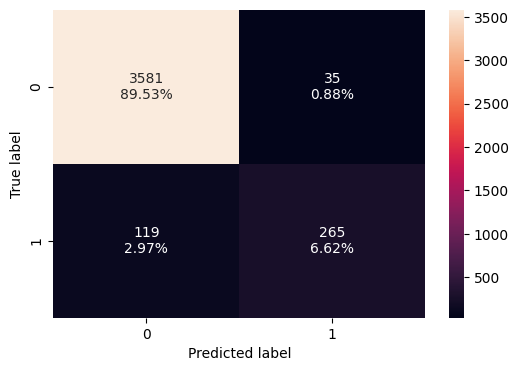

In [95]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, ylog_train)

**Observations:**
1. *False negative value for logistics model with selected features is still high.*
2. *Shows a need for changing the hyperparameter of threshold.*

In [96]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, ylog_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0    0.9615  0.690104   0.883333  0.774854

**Observations:**
*1. The model shows recall value compared to decision trees for training data.*

In [97]:
X_test3 = Xlog_test[list(X_train3.columns)]

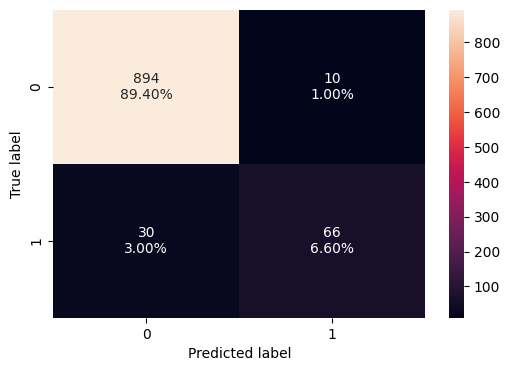

In [98]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, ylog_test)

**Observations:**
1. *For test data also, the percentage of false negatives is higher than in the decision tree model.*

In [99]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, ylog_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision        F1
0      0.96  0.6875   0.868421  0.767442

**Observations:**
1. *For test data also, the recall value is lower than that of decision tree model.*
2. *Shows that hyperparameter threshold needs to be changed from default value of 0.5 to improve recall value.*

## Logisitc Regression Model Performance Improvement

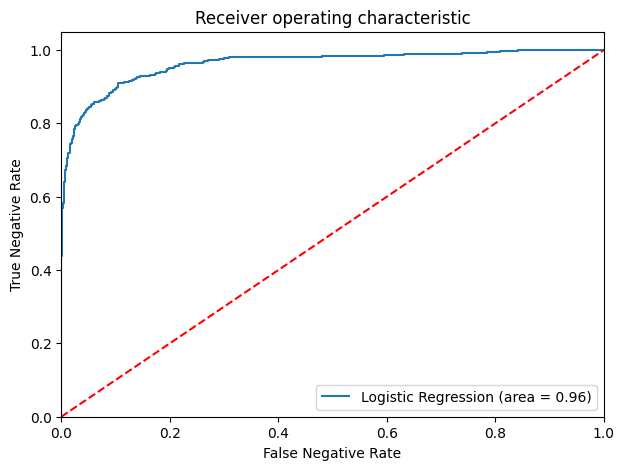

In [100]:
#Plot ROC, AUC curve (Receiver operating characteristic and Area under Curve) to determine better threshold values
logit_roc_auc_train = roc_auc_score(ylog_train, lg3.predict(X_train3)) #Get area under ROC curve
fnr, tnr, thresholds = roc_curve(ylog_train, lg3.predict(X_train3)) #Get false negative and true negative values
plt.figure(figsize=(7, 5))
plt.plot(fnr, tnr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Negative Rate")
plt.ylabel("True Negative Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observations:**
1. *The delta between True negative and False negative is best at low threshold values.  Hence, low threshold values will be best suited here.*
2. *Area under the curve of 0.96 shows significant classification results.*

In [101]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tnr is high and fnr is low
fnr, tnr, thresholds = roc_curve(ylog_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tnr - fnr) #Get index for the series value where difference between true negative and false negative is highest.
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.08980580306230984


**Observations:**
1. *Per the ROC-AUC method, the optimal value of threshold is 0.09.*

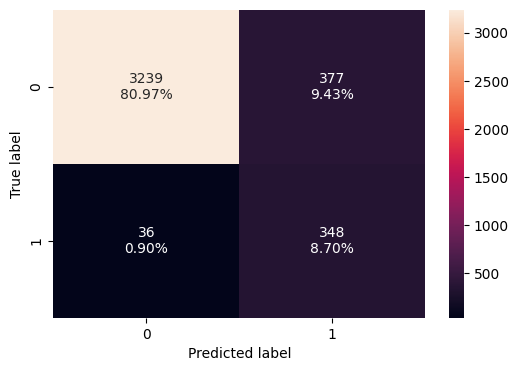

In [102]:
# creating confusion matrix for optimal threshold value
confusion_matrix_statsmodels(
    lg3, X_train3, ylog_train, threshold=optimal_threshold_auc_roc
)

**Observations:**
1. *For optimal threshold value, the false negatives drop to 0.9%*
2. *However, the false positives increase to 9.4% of observations.*

In [103]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, ylog_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy   Recall  Precision        F1
0   0.89675  0.90625       0.48  0.627592

**Observations:**
1. *For model with optimal threshold value per the ROC-AUC method, the training data shows a recall of 0.90.*
2. *This is lower than the best recall value of decision tree (pre or post prune).*
3. *Also, the precision has decreased to 0.48 which is worse than the decision tree values.*

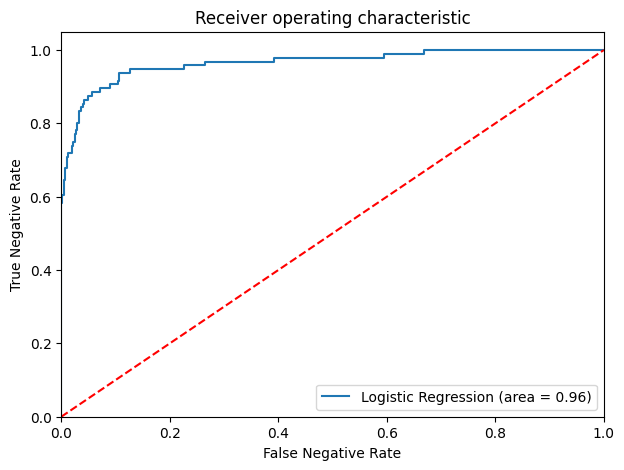

In [104]:
#Plot RUC and AUC curve for test data
logit_roc_auc_test = roc_auc_score(ylog_test, lg3.predict(X_test3)) #Get Area under the curve
fnr, tnr, thresholds = roc_curve(ylog_test, lg3.predict(X_test3)) #Get false negative, true negative values
plt.figure(figsize=(7, 5))
plt.plot(fnr, tnr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Negative Rate")
plt.ylabel("True Negative Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observations:**
1. *Area under the curve for test data is also 0.96, showing significance of the curve.*
2. *Difference between true negative and false negative is highest at low threhold values.*


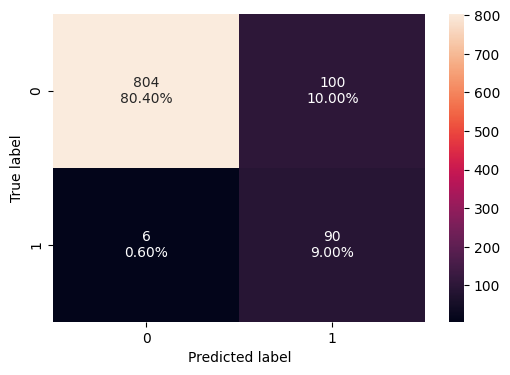

In [105]:
# creating confusion matrix for test data with optimal threshold value
confusion_matrix_statsmodels(lg3, X_test3, ylog_test, threshold=optimal_threshold_auc_roc)

**Observations**:
1. *The test data for optimal threshold value of the model has false negatives of 0.6% and false positives of 10%.*
2. *While the stand alone values are good, this performance is still slightly worse than the decision tree model values.*

In [106]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, ylog_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision        F1
0     0.894  0.9375   0.473684  0.629371

**Observations:**
1. *For test data, the optimal threshold value model gives a recall of 0.938 and precision of 0.473.*
2. *While these values are ok, the decision tree model had better recall and precision values.*

### Precision-Recall Curve

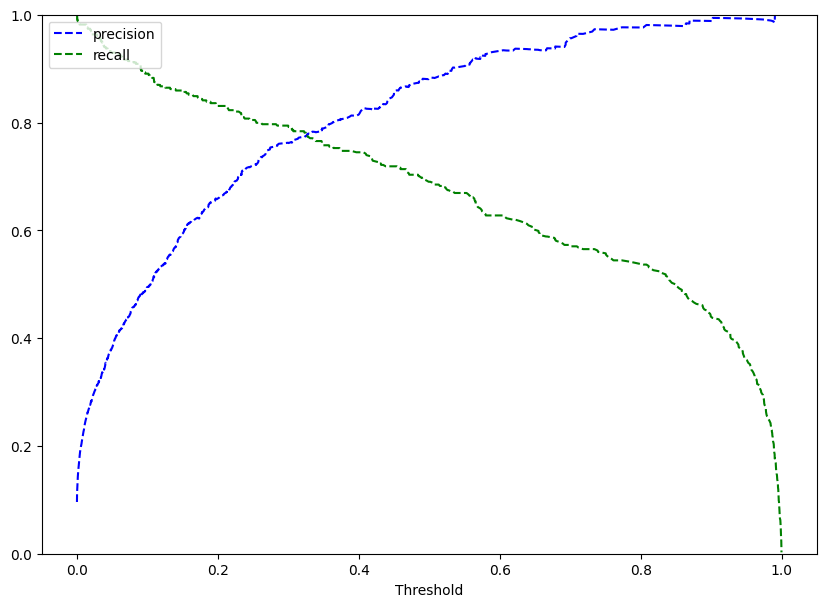

In [107]:
#Get the optimal threshold value through precision recall curve
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(ylog_train, y_scores,) #Get precision, recall for different threshold values in the model


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Observations:**
1. *The best recall values are at lowest threshold values.  So a value close to zero might be best but it should still have a reasonable precision value.*

In [108]:
# setting the threshold
optimal_threshold_curve = 0.01 #For max recall

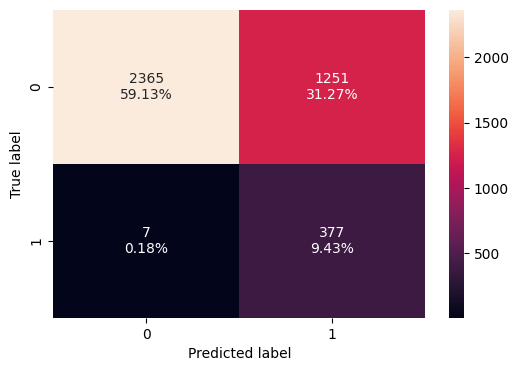

In [109]:
# creating confusion matrix for training data for optimal threshold value
confusion_matrix_statsmodels(lg3, X_train3, ylog_train, threshold=optimal_threshold_curve)

**Observations:**
1. *For threshold value of 0.01, the false negatives drop to 0.17%, showing a very good recall performance on training data.*
2.  *However, the false positives shoot up to 31%, showing that the using the model will imply pursuing lots of customers that will not accept the loan.*

In [110]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, ylog_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0    0.6855  0.981771   0.231572  0.374751

**Observations:**
1. *The recall value for this threshold is 0.98 for training data.*
2. *However, the precision value has deteriorated to 0.23*

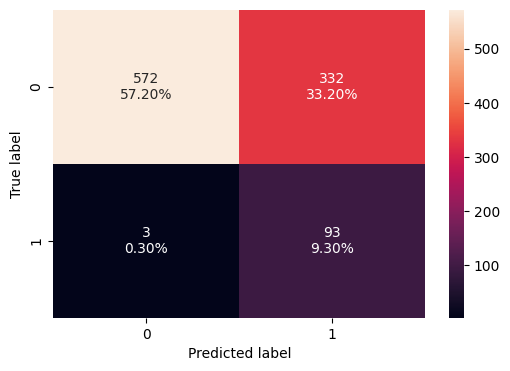

In [111]:
# creating confusion matrix for test data for optimal threshold value
confusion_matrix_statsmodels(lg3, X_test3, ylog_test, threshold=optimal_threshold_curve)

**Observations:**
1. *For test data also, the false negatives have dropped to 0.3%.*
2. *However, the false positives have shot up to 33.2% also.*

In [112]:
#Determine model performance at optimal threshold value
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, ylog_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy   Recall  Precision        F1
0     0.665  0.96875   0.218824  0.357006

**Observations**:
1. *For test data, the recall is still high at 0.97.*
2. *The test data results are very comparable to training data results, showing the model is generalizing well.*
3. *However, the precision has dropped to 0.22 which is quite low.*

In [113]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.01 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.961500   
Recall                                        0.690104   
Precision                                     0.883333   
F1                                            0.774854   

           Logistic Regression-0.09 Threshold  \
Accuracy                             0.896750   
Recall                               0.906250   
Precision                            0.480000   
F1                                   0.627592   

           Logistic Regression-0.01 Threshold  
Accuracy                             0.685500  
Recall                               0.981771  
Precision                            0.231572  
F1                                   0.374751

**Observations:**
1. *The model with threshold value of 0.01 is the better model here with recall value of 0.98 for training data.*

In [114]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.01 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.960000   
Recall                                        0.687500   
Precision                                     0.868421   
F1                                            0.767442   

           Logistic Regression-0.09 Threshold  \
Accuracy                             0.894000   
Recall                               0.937500   
Precision                            0.473684   
F1                                   0.629371   

           Logistic Regression-0.01 Threshold  
Accuracy                             0.665000  
Recall                               0.968750  
Precision                            0.218824  
F1                                   0.357006

**Observations:**
1. *The same model with threshold value of 0.01 provides the best recall value for the test data as well.  So one should use that as the best logistic regression model here.*
2.  *However, even this model has worse performance on both recall value, as well as much more so on precision value than the decision tree models.*

**Conclusion : The post-prune decision tree model performs the best compared to pre-prune decision tree model, or even the logistic regression model with optimal threshold.  Hence, we decide to proceed with the post-prune decision tree model.**

###Segmenting the customers to determine features for the appropriate target segment
### KMeans Clustering

Start with processing the data

In [115]:
#Drop the id columns and y (preidictor) column from data to segment across x (features) of customers
X=data.drop(['ID','Personal_Loan','Experience'],axis=1) #Dropping the experience column, as it is highly correlated to age and could result in interpretation issues if both stay in the data

#convert categorical data to dummy variables
#Add Dummy variables for categorical variables in X
X = pd.get_dummies(X, drop_first=True)


#Convert all columns in X to float
X = X.astype(float)

Scaling the data

In [116]:
# scaling the data before clustering
scaler = StandardScaler()
subset = X.copy()
subset_scaled = scaler.fit_transform(subset)

In [117]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
print(subset_scaled_df.head())

        Age    Income     CCAvg  Mortgage  ZIPCode_91  ZIPCode_92  ZIPCode_93  \
0 -1.774417 -0.538229 -0.193385 -0.555524    2.801706   -0.496247   -0.301643   
1 -0.029524 -0.864109 -0.250611 -0.555524   -0.356925   -0.496247   -0.301643   
2 -0.552992 -1.363793 -0.536736 -0.555524   -0.356925   -0.496247   -0.301643   
3 -0.901970  0.569765  0.436091 -0.555524   -0.356925   -0.496247   -0.301643   
4 -0.901970 -0.625130 -0.536736 -0.555524    2.801706   -0.496247   -0.301643   

   ZIPCode_94  ZIPCode_95  ZIPCode_96  Family_2  Family_3  Family_4  \
0   -0.645936   -0.441297   -0.089803 -0.591517 -0.503123  1.758310   
1   -0.645936   -0.441297   -0.089803 -0.591517  1.987585 -0.568728   
2    1.548141   -0.441297   -0.089803 -0.591517 -0.503123 -0.568728   
3    1.548141   -0.441297   -0.089803 -0.591517 -0.503123 -0.568728   
4   -0.645936   -0.441297   -0.089803 -0.591517 -0.503123  1.758310   

   Education_2  Education_3  Securities_Account_1  CD_Account_1  Online_1  \
0    -0.6

**Observations**:
1. The above exercise ensures that all columns are converted to numbers, all entries scaled by their standard deviation and mean.

## Dimensionality Reduction and Visualization using t-SNE

### Reduction to 2 dimensions

In [118]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions

In [119]:
#Determine the shape of the 2 dimensional feature set
tsne_2d_data.head()

Feature 1  Feature 2
0  25.140572 -28.784458
1 -17.200722  37.324673
2 -13.266833  13.383594
3 -32.016235 -17.221113
4  42.899776 -47.323349

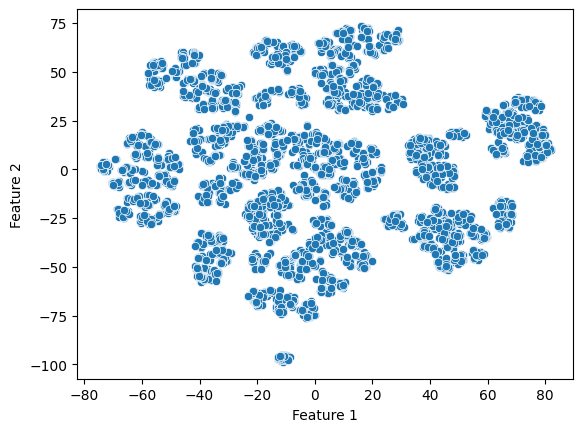

In [120]:
#plot the scattergraph of the two features
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2");

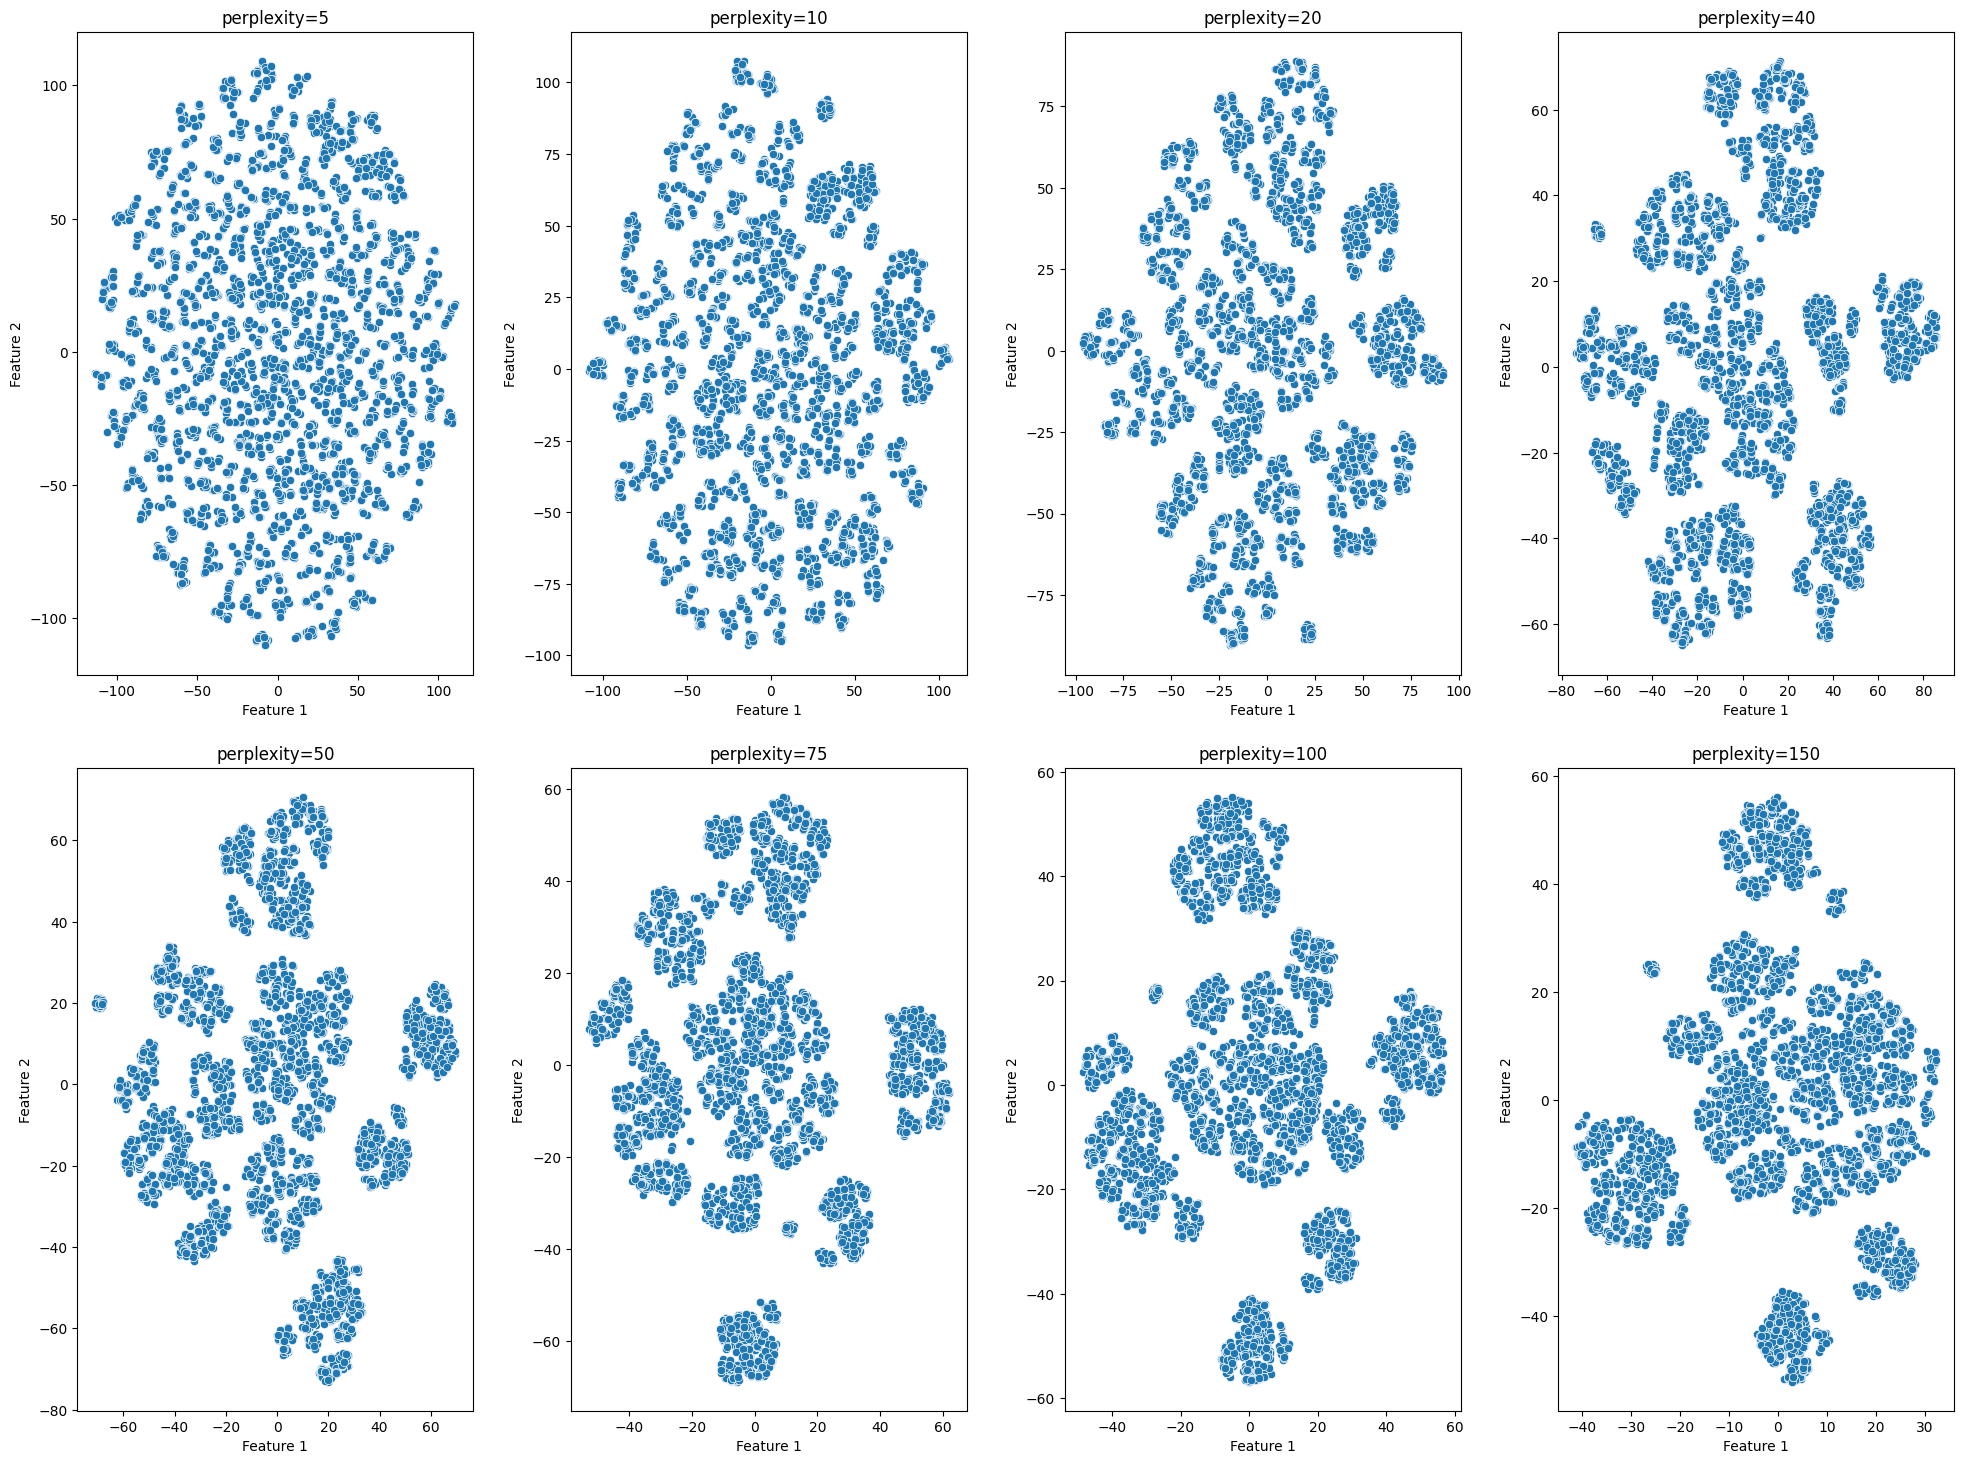

In [121]:
#Determine better clusters through optimal values of perplexity
# Define the list of perplexity values to iterate over
perplexities = [5, 10, 20, 40, 50, 75, 100, 150]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(subset_scaled_df)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

**Observations:**
1. Since the clustering starts happening better at perplexity values of 100 and 150, we need to investigate higher values of perplexity also.  
2. Hence, let us try perplexities of 200 to 300 as well.

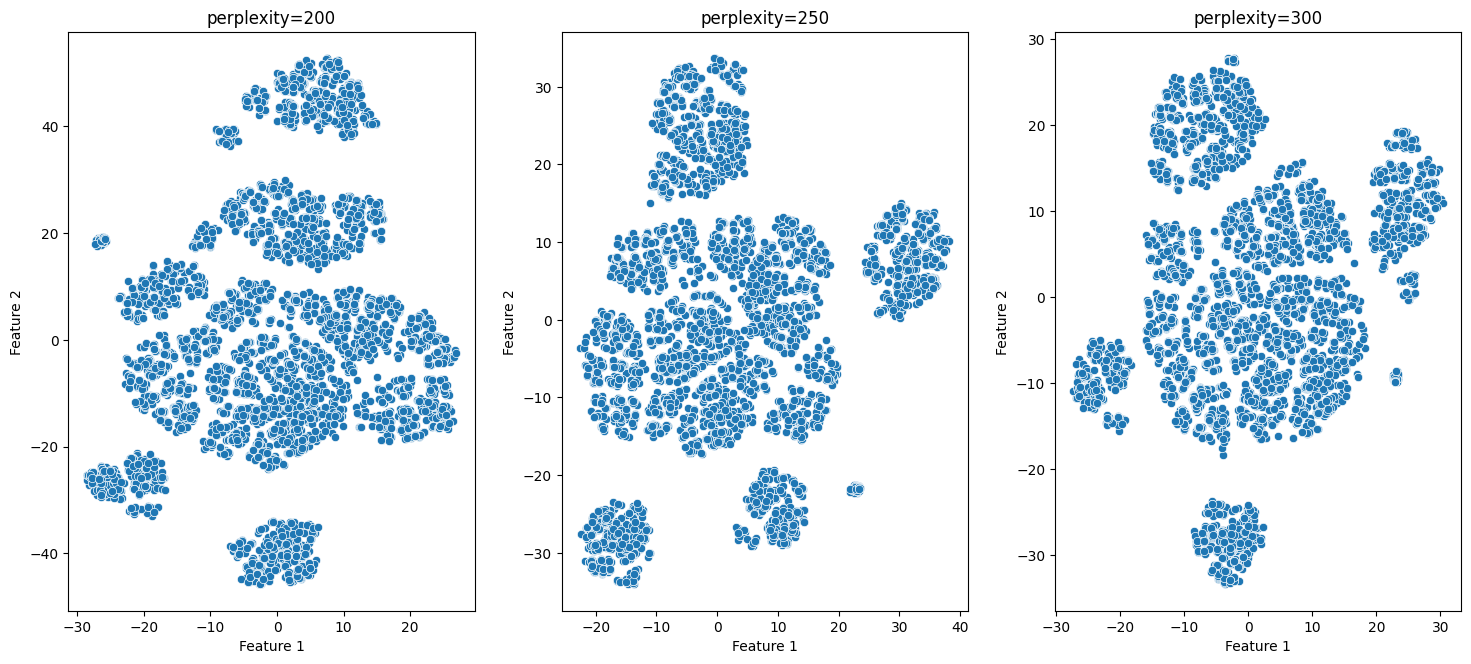

In [122]:
# Define higher values of perplexity to iterate over
perplexities = [200, 250, 300]

plt.figure(figsize=(20, 7))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(subset_scaled_df)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(1, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

**Observations:**
1. *Additional perplexity values do not result in better clusters.  Hence, let us proceed with perplexity value of 100 only.*

In [123]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=100, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

Feature 1  Feature 2
0  43.918518  -6.359047
1  30.609488  -5.320126
2  11.053799   0.353089
3   5.341627  20.936352
4  51.445728  14.032801

### Reduction to 3 dimensions


- Let us proceed with perplexity=100 here directly

In [124]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=100, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(subset_scaled_df)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions

In [125]:
tsne_3d_data.head()

Feature 1  Feature 2  Feature 3
0  14.612911 -14.198156  -5.514555
1  15.185445  -3.103849  -2.458807
2   1.338905   0.061514  -7.633700
3   8.289749   6.870090  -9.132401
4   3.142006 -14.242430 -15.424405

In [126]:
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

## Model Building for K-Means

In [127]:
#Copy original scaled dataframe
k_means_df = subset_scaled_df.copy()


##Elbow method to determine optimal number of customers

In [128]:
#Use Within Clusters Sum of Squares Elbow Method to determine optimal number of clusters
clusters = range(2, 20)
WCSS = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=RS)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)

    wcss = model.inertia_


    WCSS.append(wcss)

    print("Number of Clusters:", k, "\twcss:", wcss)

Number of Clusters: 2 	wcss: 88502.78711294383
Number of Clusters: 3 	wcss: 83044.91663533369
Number of Clusters: 4 	wcss: 79989.32897247307
Number of Clusters: 5 	wcss: 75687.34251582225
Number of Clusters: 6 	wcss: 69941.09381530271
Number of Clusters: 7 	wcss: 64672.28112439581
Number of Clusters: 8 	wcss: 61352.05283261285
Number of Clusters: 9 	wcss: 59359.12402786017
Number of Clusters: 10 	wcss: 57551.40002931554
Number of Clusters: 11 	wcss: 56083.83463647892
Number of Clusters: 12 	wcss: 52442.26779142587
Number of Clusters: 13 	wcss: 51385.696797300414
Number of Clusters: 14 	wcss: 50180.7348933646
Number of Clusters: 15 	wcss: 49766.33730648446
Number of Clusters: 16 	wcss: 49272.72383004366
Number of Clusters: 17 	wcss: 48878.37960743951
Number of Clusters: 18 	wcss: 47913.579955738984
Number of Clusters: 19 	wcss: 47039.15189525159


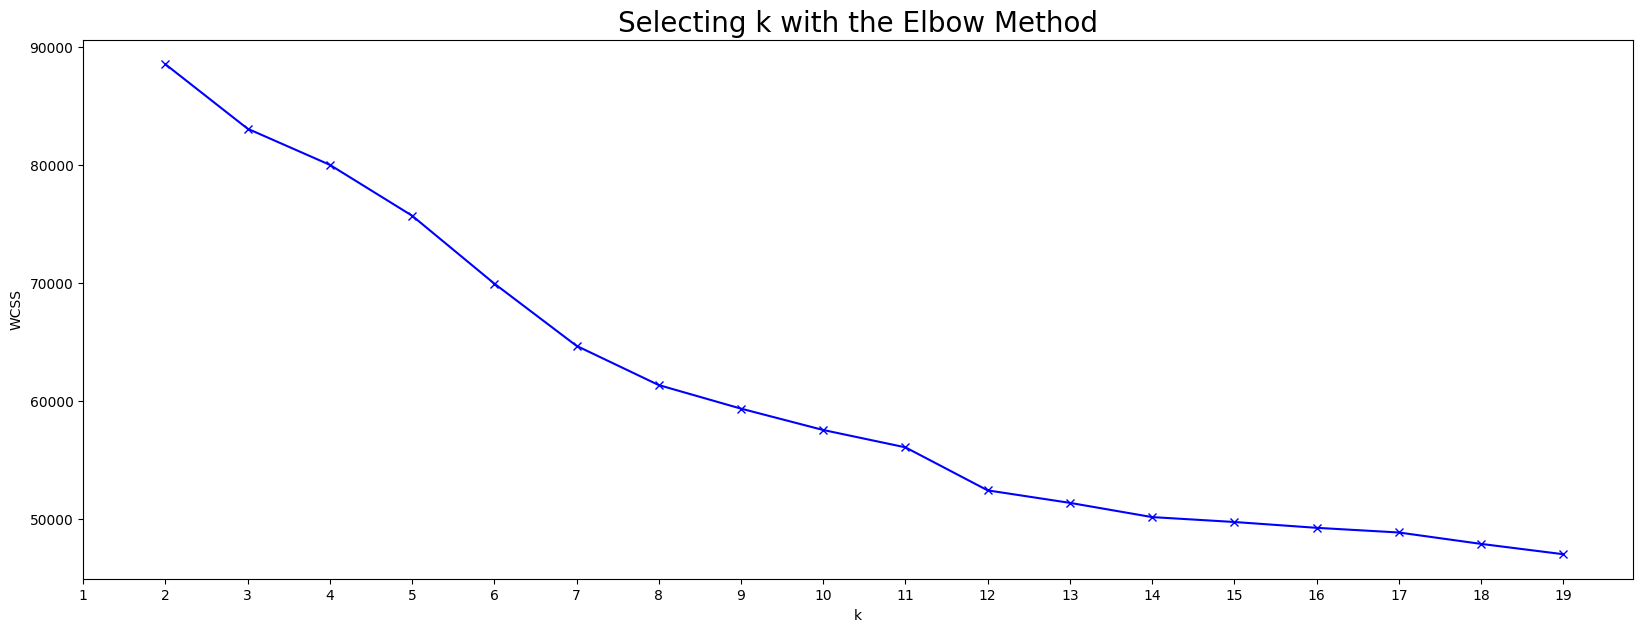

In [129]:
plt.figure(figsize=(20, 7))
plt.plot(clusters,WCSS,"bx-")
plt.xlabel("k")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,20,1))
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**Observations**:
1. Looking at the TSNE plots, and the above curve, 7 clusters seems the ideal segmentation where further addition of clusters improves WCSS marginally.

##Silhouette score method to determine optimal number of clusters

In [130]:
#Compute Silhouette score for each iteration of number of clusters
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=RS)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.08571200855931274)
For n_clusters = 3, the silhouette score is 0.07813342295934443)
For n_clusters = 4, the silhouette score is 0.0821011661011848)
For n_clusters = 5, the silhouette score is 0.08329287418472212)
For n_clusters = 6, the silhouette score is 0.12290004636613237)
For n_clusters = 7, the silhouette score is 0.14368203582687417)
For n_clusters = 8, the silhouette score is 0.13646636321766067)
For n_clusters = 9, the silhouette score is 0.13497910596206797)
For n_clusters = 10, the silhouette score is 0.12777093704763762)


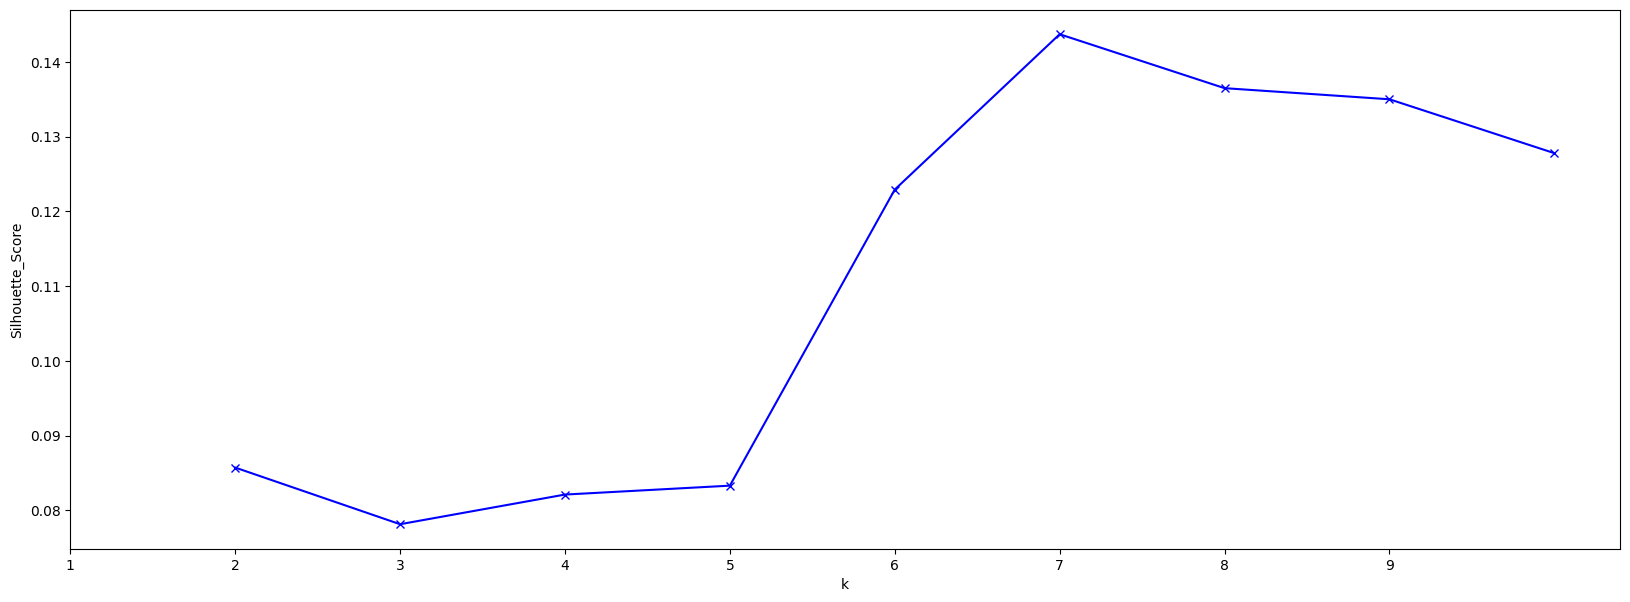

In [131]:
plt.figure(figsize=(20, 7))
plt.plot(cluster_list, sil_score, "bx-")
plt.xlabel("k")
plt.ylabel("Silhouette_Score")
plt.xticks(np.arange(1,10,1))

plt.show()

**Observations:**
1. *The Silhouette score is not high for any of the clusters, implying that the within cluster distances are not as distinct from outside cluster distances.  Thus, the clusters may not be highly distinct.*
2. *7 clusters is the most optimal set of clusters as per this method as that provides the best S-Score.  Hence, let us proceed with 7 clusters.*

In [132]:
kmeans = KMeans(n_clusters=7, random_state=RS)
kmeans.fit(k_means_df)

KMeans(n_clusters=7, random_state=0)

In [133]:
# creating a copy of the original data
df1 = X.copy()
# adding kmeans cluster labels to the dataframes
k_means_df["K_means_segments"] = kmeans.labels_    # labeling each of the scaled datadrame row with cluster id
df1["K_means_segments"] = kmeans.labels_    # utilizing the same cluster id on treated original dataset
tsne_2d_data["K_means_segments"] = kmeans.labels_    # labeling t-SNE 2D with cluster id
tsne_3d_data["K_means_segments"] = kmeans.labels_    # labeling t-SNE 3D with cluster id

## Cluster Profiling

### Visualizing Final Clusters

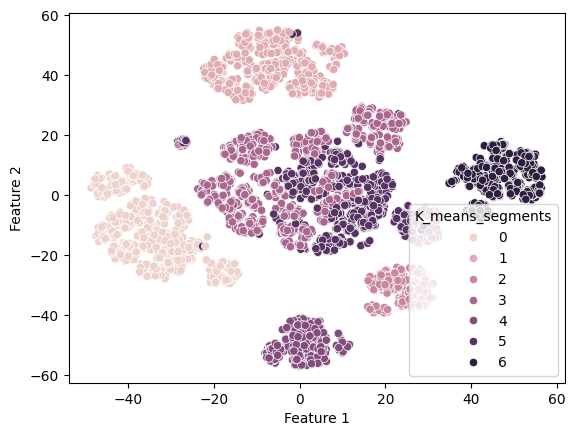

In [134]:
# visualizing the final cluster using t-SNE 2D
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue='K_means_segments');

**Observations:**
1. *Five of the segments have distinct characteristics (segment 0,1,2 4, and 6), except that segment 3 and segment 5 are overlapping somewhat.*

In [135]:
# visualizing the final cluster using t-SNE 3D
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color='K_means_segments')
fig.show()

**Observation**:
1. *Here also in the 3-d plot, it is evident that five of the segments are quite distinct, while two segments are overlapping.*

### Cluster Characteristics

In [136]:
#Add back the personal loan column into df1 as we want to see the personal loan conversion in each segment
df1['Personal_Loan'] = df['Personal_Loan']
#Group each column by clusters, and average out each feature per cluster to understand segment characteristics
km_cluster_profile = df1.groupby("K_means_segments").mean()

In [137]:
#Understand the sample size represented by each segment
km_cluster_profile["count_in_each_segment"] = (
    df1.select_dtypes(include=np.number).groupby("K_means_segments")["Age"].count().values
)

In [138]:
# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [139]:
#compare these rows and clusters with population mean of each column
print(km_cluster_profile.mean().to_frame().T)

         Age     Income     CCAvg   Mortgage  ZIPCode_91  ZIPCode_92  \
0  45.421228  77.924151  2.072288  60.986644    0.157521    0.168014   

   ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  Family_2  Family_3  \
0    0.156102    0.233242    0.166122    0.008597  0.280061  0.199024   

   Family_4  Education_2  Education_3  Securities_Account_1  CD_Account_1  \
0  0.225969     0.271423     0.304505              0.139319      0.142857   

   Online_1  CreditCard_1  Personal_Loan  count_in_each_segment  
0  0.628264       0.33892       0.130333             714.285714  


**Observations :**
1. *Segments two and five have the best conversion to personal loan.*
2. *Boxplots of each of these clusters will provide us detailed visualization of their features.*

##Visualize Cluster Features

In [144]:
#Let us assess the boxplot of all numerican columns in the segments
num_col = df1.select_dtypes(include=np.number).columns.to_list()
print(num_col)

['Age', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'K_means_segments', 'Personal_Loan']


In [186]:
#Make K_means_segments the last column of df1 instead of second last
df1['Cluster']=df1['K_means_segments']
df1.drop('K_means_segments',axis=1,inplace=True)

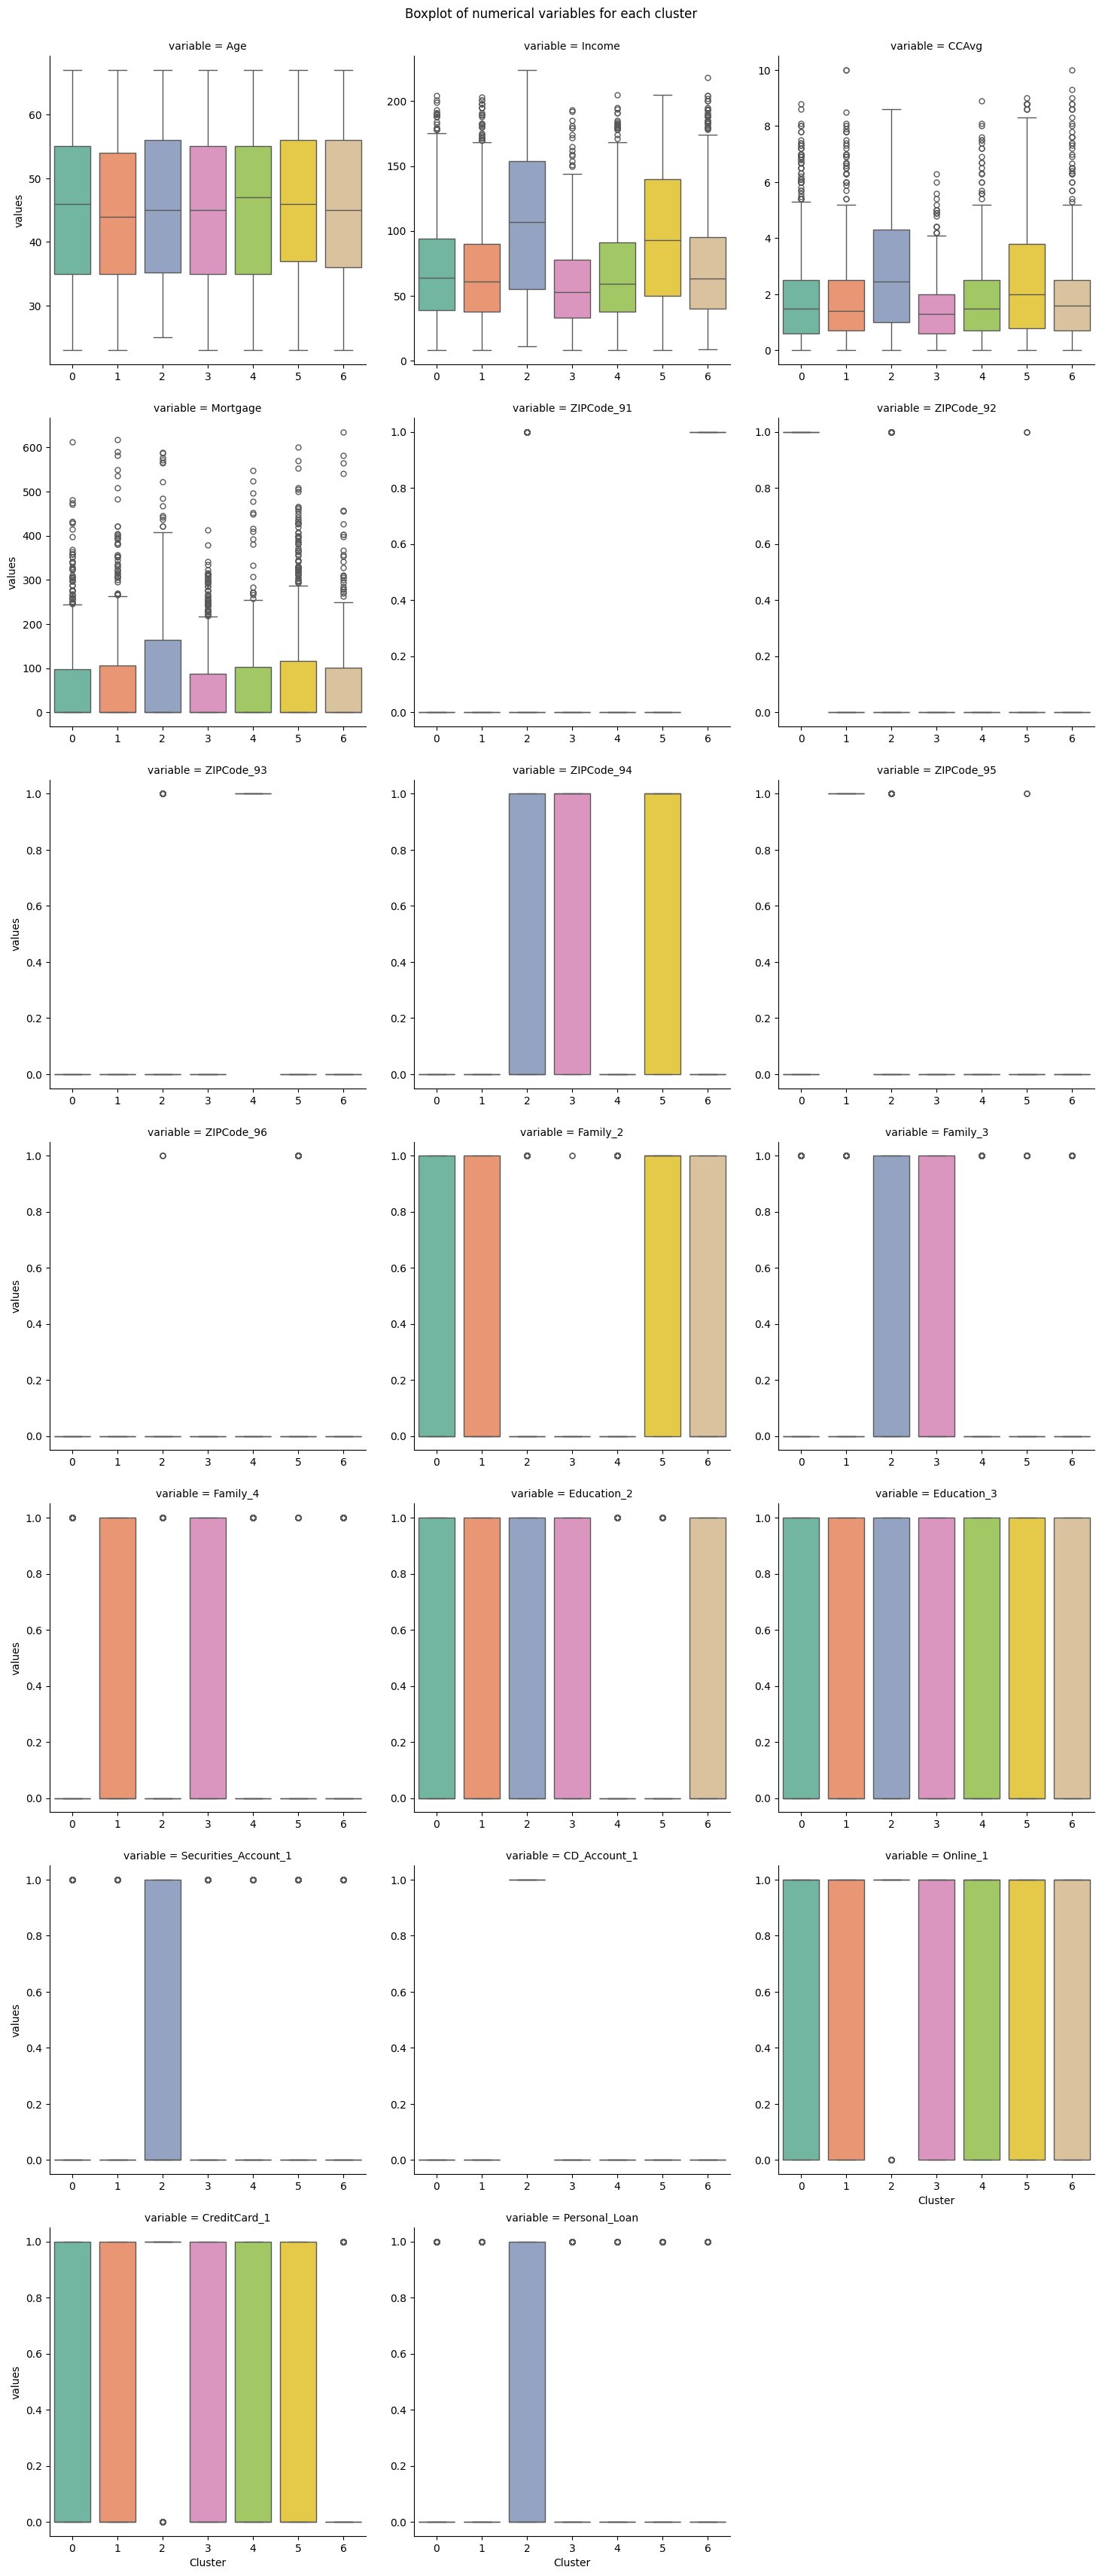

In [198]:
# Reshape the data to "long form" ---
# This makes it easy to iterate through features for plotting
df_long = df1.melt(
    id_vars='Cluster',           # ID variables (cluster labels)
    value_vars=(df1.columns[:-1]),  # Features to plot (all except 'Cluster')
    #Also plotting against the loan acceptance conversion
    var_name='variable',         # Name for the new feature column
    value_name='values'          # Name for the new value column
)

# Plot the boxplots using seaborn catplot ---

g=sns.catplot(
    kind='box',          # Specify boxplot type
    data=df_long,        # Use the long-form DataFrame
    col='variable',      # Create a separate plot for each feature column
    y='values',          # Feature values on the y-axis
    x='Cluster',         # Cluster labels on the x-axis
    palette='Set2',      # Use a color palette
    sharey=False,        # Allow each plot to have its own y-axis scale
    col_wrap=3           # Adjust the number of plots per row
)
g.fig.suptitle("Boxplot of numerical variables for each cluster\n\n")
for ax in g.axes.flat:
        ax.tick_params(labelbottom=True) # Ensure labels are shown at the bottom
plt.tight_layout(pad=2) # Adjust layout to prevent overlapping
plt.show()

**Observations :**
1. *This table now present a very clear picture of each segment characteristic, its position with respect to population mean, and its loan conversion characteristic.*
2. *Segment Zero - Comprised of customers that live in Zipcode area 92, have moderate to low income and credit card spend, have a skew towards undergraduate in education, do not have CD accounts, have fewer visits online than average population, and have fewer credit cards with other banks.*  
3. *Segment One - Comprised of customers that live in Zipcode area 95, have moderate to low income and credit card spend, have a skew towards undergraduate in education, do not have CD accounts, have less than average online, and have fewer credit cards with other banks.*
4. *Segment Two - Comprised of customers that have highest income, highest credit card spend, higher mortgages, live in zipcode regions 94,95, and 90, have skew towards higher education, and family sizes of 3 and 4, have high propensity to CD accounts and security accounts.  These customers have the best propensity to convert to loans.*
5. *Segment Three - This segment feels like the bottom of the social pyramid.  They have lowest average income, lowest credit card spend, lowest amount in mortgages, live in zipcode area 94 or 90, have skew towards undergraduate to graduation, have family sizes of 3/4, have low propensity for securities or CD account.  This segment is the most voluminous, and has the least propensity to opt for personal loan.*
6. *Segment Four - Comprised of customers that live in Zipcode area 93, have low to moderate income, low to moderate credit card spend, low to moderate amount in mortgages, have skew towards advanced education, have skew towards singles or family sizes of two, have low propensity for securities or CD account.  Have below average conversion to personal loans.*
7. *Segment Five - Comprised of customers that live primarily in Zipcode area 94 and 90, have the second highest income, credit card spend, and mortgages; have heavy skew towards family size of 1 or 2, have higher propensity for securities account and spend above average time online, have heavy skew towards undergraduates or graduates.  These customers also have higher propensity to opt for loan than average.*
8. *Segment Six - This segment comprises of customrs who live in Zipcode Area 91, have average income, credit card spend and mortgage, have evenly distributed family size and education, have low propensity of securities and CD accounts.  These customers have moderate to low propensity for personal loan.*
9.  ***Thus, the best campaigns should be targeted at Segments Two and Five.  Rest of all the segments have somewhat simlar propensity to convert, and these should be targeted through regular reach-outs*.**

## Actionable Insights and Business Recommendations


*Observations:*
1. *Since the best logistic regression model had worse recall and precision values compared to the optimal pre-pruned tree as well as post-pruned tree model, the logistic regression model should not be use.*
2. *If computation power is not an issue, then the bank should use post-pruned tree model with alpha of 0.001917.  This provides a recall value of 1 on test data, which matches very well with training data.  So the model generalizes well.  Moreover, that model has a high precision score that will reduce false positives as well.*
3. *If computation power is an issue, and the bank wants to use a simple model, a simple pre-pruned tree of depth 2 is good enough for the purpose.  The recall value is still 1.0 and the model generalizes well.  However, the percentage of false positives predicted by the model will be high in this case.*
4. *Following the simple pre-pruned tree model, the bank should market the personal loan application to all customers that satisfy the following criteria :Their income should be higher than 92.5k; or if the income is lower than 92.5k, their average monthly credit card spend should be more than 2.95k.*
5.  *The post-pruned tree provides a more sophisticated approach that incorporates family size and education of the customer as well, and specially helps screen out the customers that are unlikely to ask for get accepted for their personal loan application.*
6.  *Per the Kmeans segmentation carried out, the bank should target its marketing effort towards prospects that belong to Customer Segments Two and Five.  These have residence in Area codes 94,90, or 95; have high income and credit card spend (the decision tree models provide specific values), have a high propensity towards a CD account and securities account.  These customers will have a high conversion ratio when targeted for personal loan marketing.*
7. *The bank should keep collecting data of loan applicants, those who agree to apply for loan, and those whose loan application gets approved to continue to fine-tune the model with shifting trends of economics and demographics.*


___